In [34]:
from moabb.datasets import BNCI2014_001
from moabb.paradigms import MotorImagery

dataset = BNCI2014_001()

#data = dataset.get_data()

paradigm = MotorImagery()

X, y, metadata = paradigm.get_data(dataset=dataset)

Choosing from all possible events
/Users/kasperhenningsen/Desktop/moabb---Private-Encoder-Thesis-/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 48 events (all good), 2 – 6 s (baseline off), ~8.1 MB, data loaded,
 'left_hand': 12
 'right_hand': 12
 'feet': 12
 'tongue': 12>
  warn(f"warnEpochs {epochs}")
/Users/kasperhenningsen/Desktop/moabb---Private-Encoder-Thesis-/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 48 events (all good), 2 – 6 s (baseline off), ~8.1 MB, data loaded,
 'left_hand': 12
 'right_hand': 12
 'feet': 12
 'tongue': 12>
  warn(f"warnEpochs {epochs}")
/Users/kasperhenningsen/Desktop/moabb---Private-Encoder-Thesis-/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 48 events (all good), 2 – 6 s (baseline off), ~8.1 MB, data loaded,
 'left_hand': 12
 'right_hand': 12
 'feet': 12
 'tongue': 12>
  warn(f"warnEpochs {epochs}")
/Users/kasperhenningsen/Desktop/moabb---Private-Encoder-Thesis-/moabb/datasets

In [44]:
import torch
from shallowDict import ShallowPrivateCollapsedDictNetSlow 

# Initialize the model architecture
convDictionaryModel = ShallowPrivateCollapsedDictNetSlow(22,4)

# Load the saved state dictionary
state_dict = torch.load('results_42_BNCI2014-001/ShallowPrivateCollapsedDictNetSlow/Models_AllRuns/BNCI2014-001/mixed/ShallowPrivateCollapsedDictNetSlow_ShallowPrivateCollapsedDictNetSlow_braindecode_example/eegclassifier_fitted_0_model.pkl', map_location=torch.device('cpu'))

# Load the state dictionary into the model
convDictionaryModel.load_state_dict(state_dict)

# Put the model in evaluation mode
convDictionaryModel.eval()



/tmp/ipykernel_3667174/1953462619.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load('results_42_BNCI2014-001/ShallowPrivateCollapsedDictNetSlow/Mod

ShallowPrivateCollapsedDictNetSlow(
  (spatio_temporal_layers): ModuleDict(
    (subject_1): Conv2d(22, 40, kernel_size=(1, 25), stride=(1, 1))
    (subject_2): Conv2d(22, 40, kernel_size=(1, 25), stride=(1, 1))
    (subject_3): Conv2d(22, 40, kernel_size=(1, 25), stride=(1, 1))
    (subject_4): Conv2d(22, 40, kernel_size=(1, 25), stride=(1, 1))
    (subject_5): Conv2d(22, 40, kernel_size=(1, 25), stride=(1, 1))
    (subject_6): Conv2d(22, 40, kernel_size=(1, 25), stride=(1, 1))
    (subject_7): Conv2d(22, 40, kernel_size=(1, 25), stride=(1, 1))
    (subject_8): Conv2d(22, 40, kernel_size=(1, 25), stride=(1, 1))
    (subject_9): Conv2d(22, 40, kernel_size=(1, 25), stride=(1, 1))
  )
  (pool): AvgPool2d(kernel_size=(1, 100), stride=(1, 100), padding=0)
  (instance_norm): InstanceNorm2d(40, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): LazyLinear(in_features=0, out_features=4, bias=True)
)

In [45]:
import torch
import matplotlib.pyplot as plt
import numpy as np

def visualize_conv_weights(model, subject_id, layer_name, num_kernels_to_display=5):
    """
    Visualizes the convolutional weights of a specified layer for a given subject.

    Parameters:
    - model: The neural network model.
    - subject_id: The subject ID whose weights you want to visualize.
    - layer_name: The name of the layer containing the convolutional layers.
    - num_kernels_to_display: Number of kernels to display. Default is 5.

    Returns:
    - None. Displays the weight visualizations.
    """
    # Get the layer from the model
    layer = getattr(model, layer_name)
    
    # Get the per-subject convolutional layer
    conv_layer = layer[f'subject_{subject_id}']
    
    # Extract the weights
    weights = conv_layer.weight.data.cpu().numpy()  # Convert to NumPy array for easier handling
    
    # Get the shape of the weights
    # For Conv2d layers, the weight shape is (out_channels, in_channels, kH, kW)
    out_channels, in_channels, kH, kW = weights.shape
    
    # For visualization, we'll select a subset of kernels
    num_kernels = min(num_kernels_to_display, out_channels)
    
    # Plot the weights
    fig, axes = plt.subplots(num_kernels, 1, figsize=(10, 2 * num_kernels))
    if num_kernels == 1:
        axes = [axes]  # Ensure axes is iterable
    
    for i in range(num_kernels):
        # Get the weight map for the i-th kernel
        weight_map = weights[i]  # Shape: (in_channels, kH, kW)
        
        # Since kH can be 1, we can squeeze it
        weight_map = weight_map.squeeze()  # Shape: (in_channels, kW)
        
        # Visualize the weight map
        im = axes[i].imshow(weight_map, aspect='auto', cmap='viridis')
        axes[i].set_title(f'Kernel {i+1}')
        axes[i].set_ylabel('Channels')
        axes[i].set_xlabel('Time')
        fig.colorbar(im, ax=axes[i])
    
    plt.tight_layout()
    plt.show()


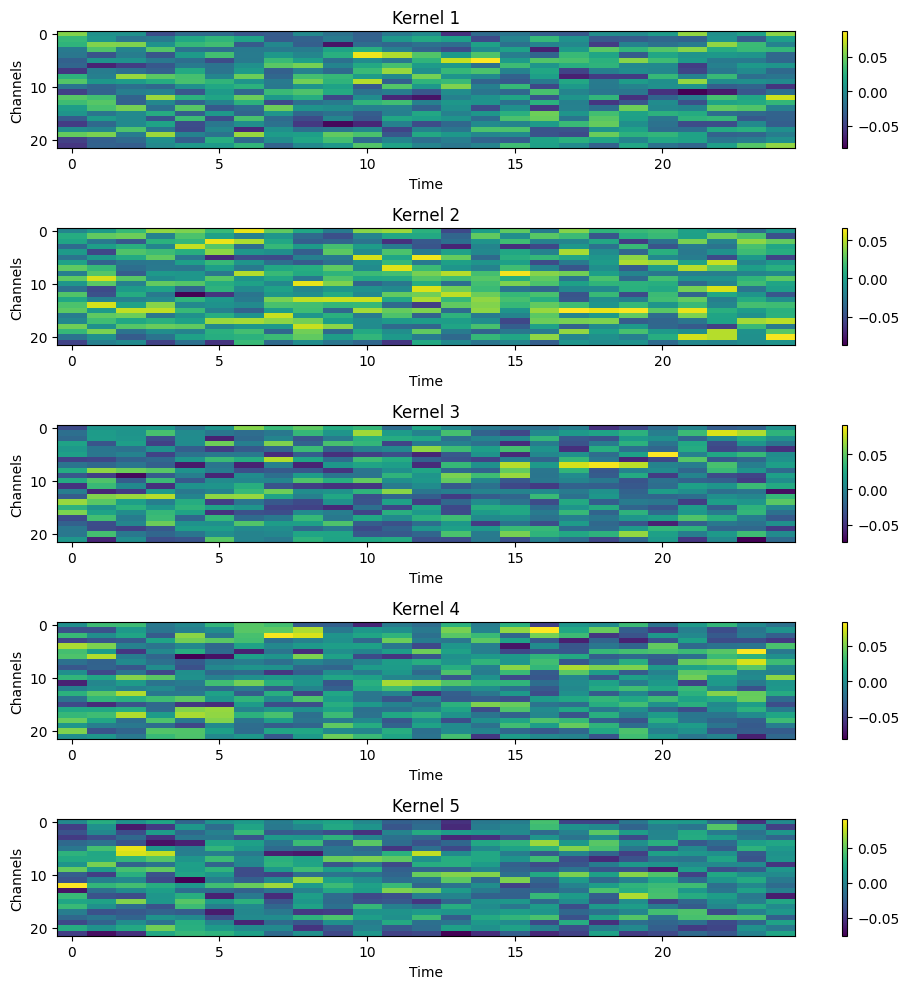

In [48]:
visualize_conv_weights(convDictionaryModel,3, "spatio_temporal_layers")

In [38]:
def visualize_eeg_weights(data, isSqueezed=False, kernel_number = 0):
    """
    Visualizes EEG-like data, where data is assumed to be in the shape (epochs, channels, 1, time_points).

    Args:
    - data (tensor/ndarray): Tensor-like data in the shape (epochs, channels, 1, time_points)
    """
    import matplotlib.pyplot as plt

    # Average across the first dimension (epochs) to get average channel response
    kernel_data = data[kernel_number]
    #avg_channel_data = data.mean(axis=0)

    # Plot each channel
    plt.figure(figsize=(15, 10))
    for i in range(kernel_data.shape[0]):  # Iterate through channels
        if isSqueezed:
            plt.plot(kernel_data[i][0], label=f'Channel {i+1}')
        else:
            plt.plot(kernel_data[i], label=f'Channel {i+1}')

    plt.title('Simulated EEG Channel Data Visualization')
    plt.xlabel('Time Points')
    plt.ylabel('Amplitude')
    plt.legend(loc="upper right", ncol=3, fontsize=8)
    plt.show()

In [25]:
convDictionaryModel.spatial_layers['subject_1'].weight.data[0].shape

torch.Size([40, 22, 1])

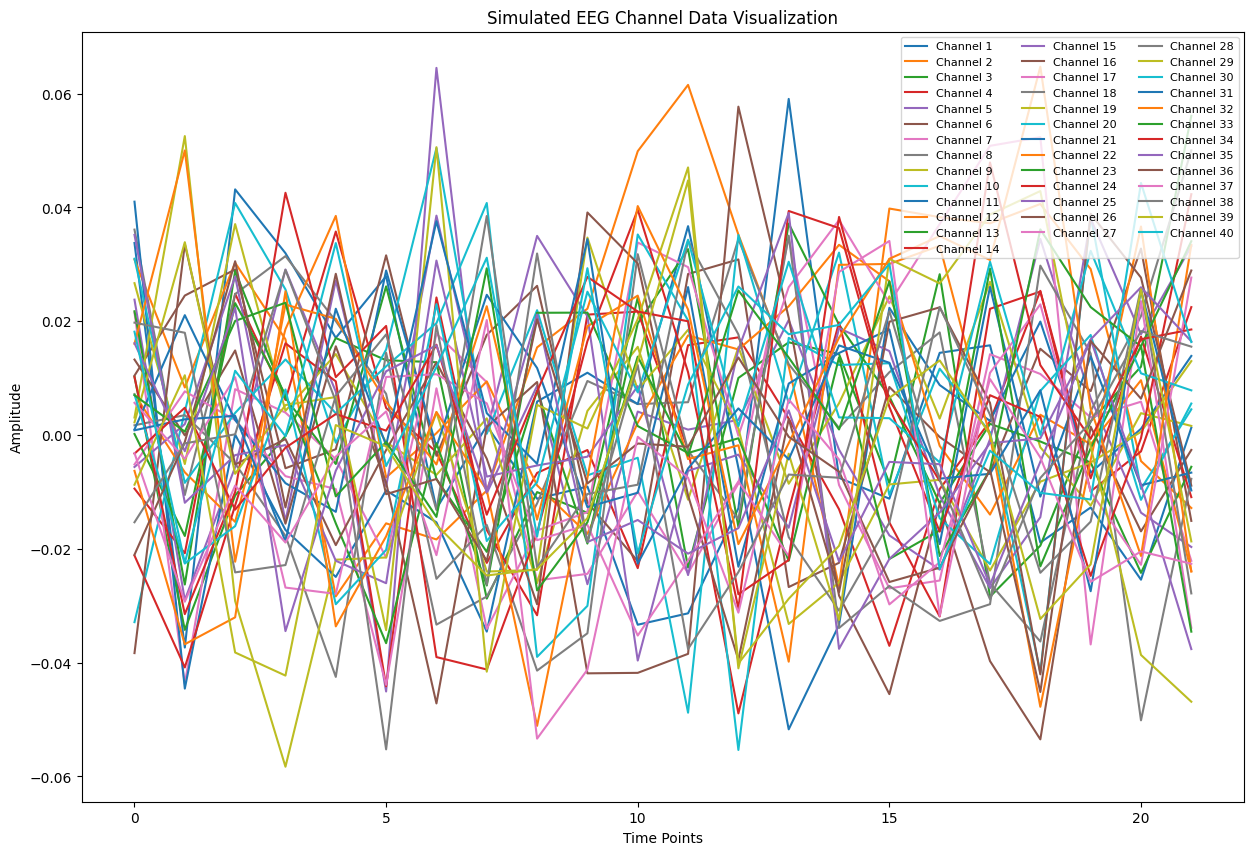

In [39]:
visualize_eeg_weights(convDictionaryModel.spatial_layers['subject_1'].weight.data, isSqueezed=False, kernel_number=39)

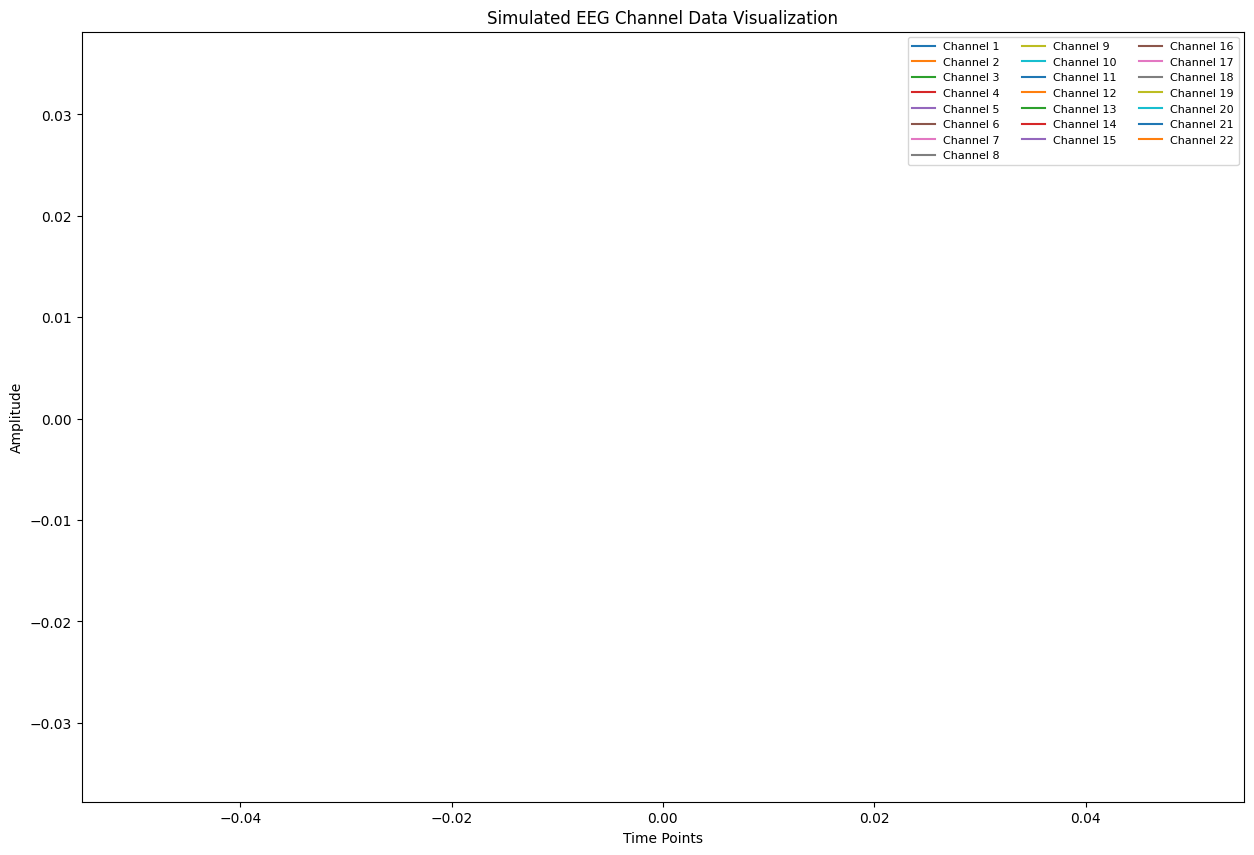

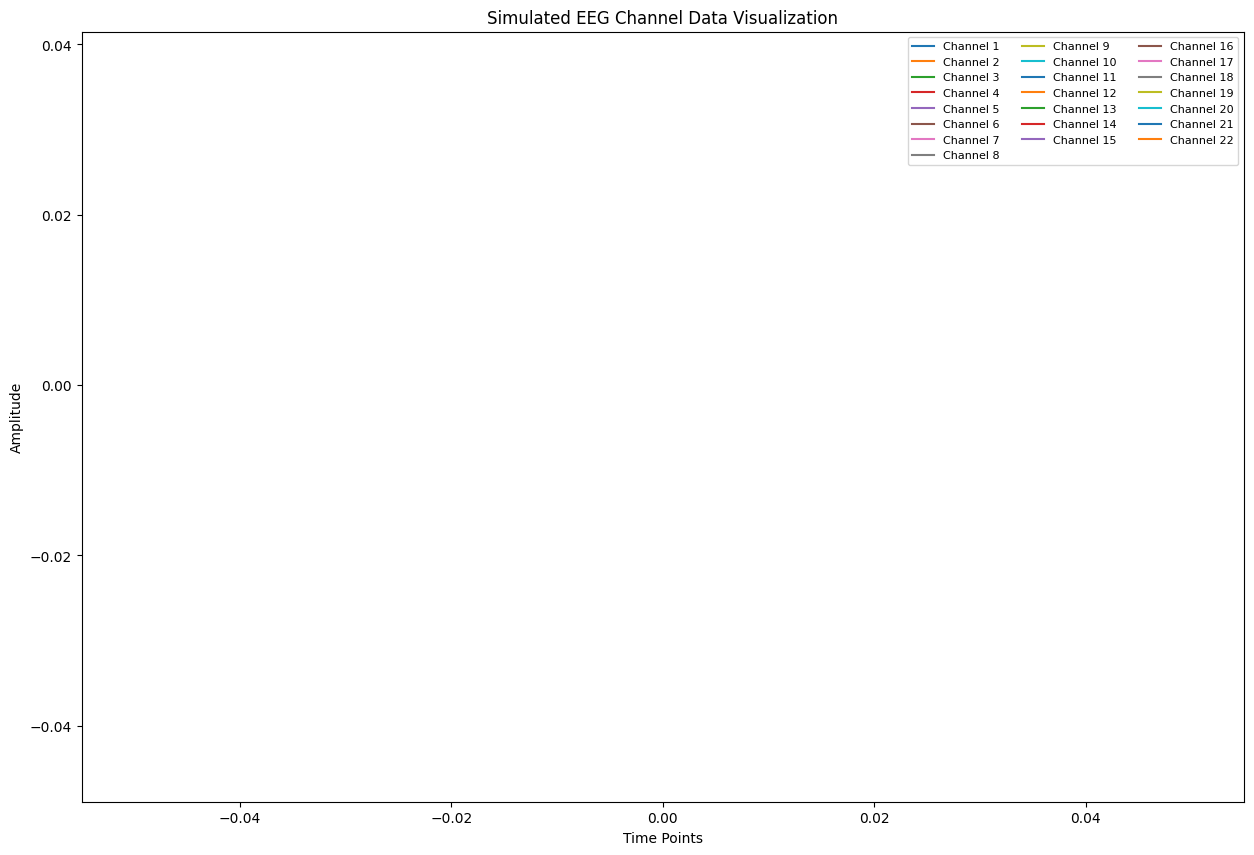

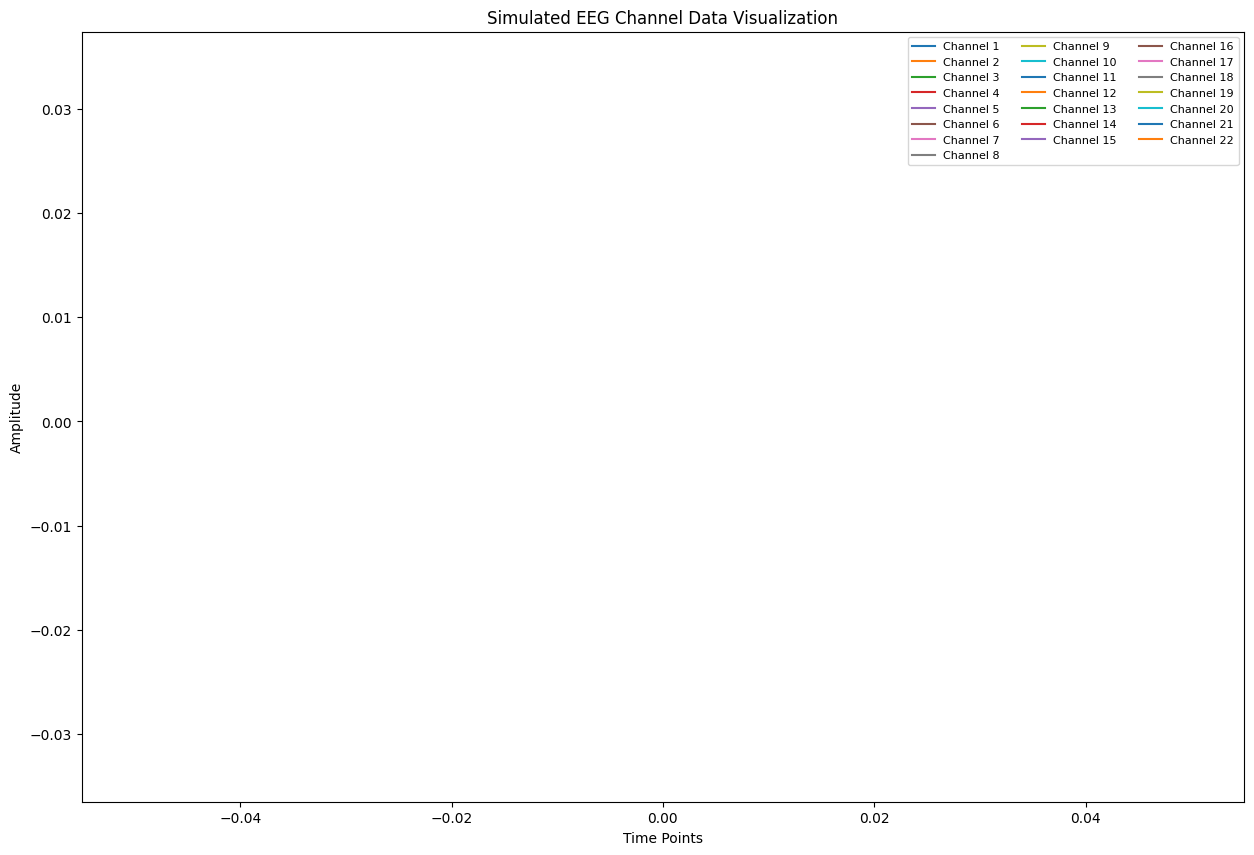

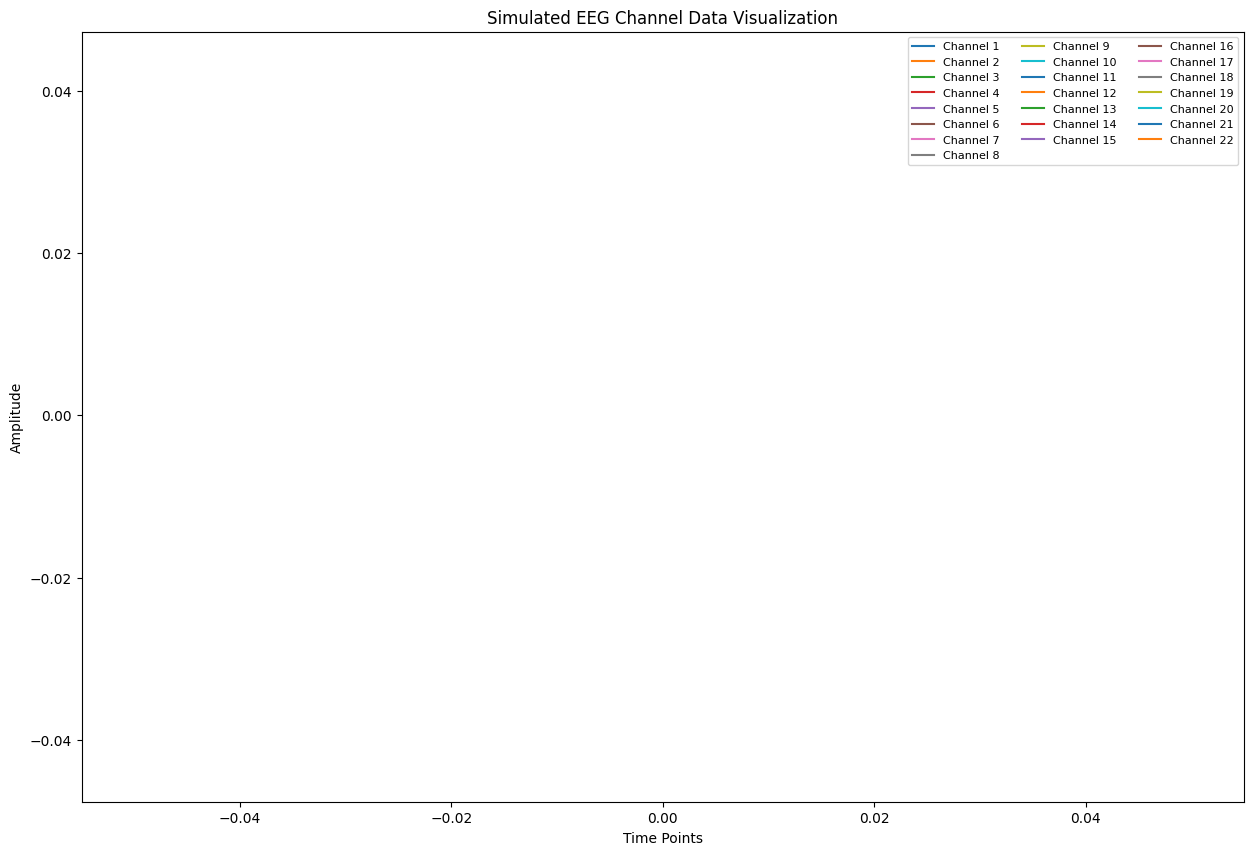

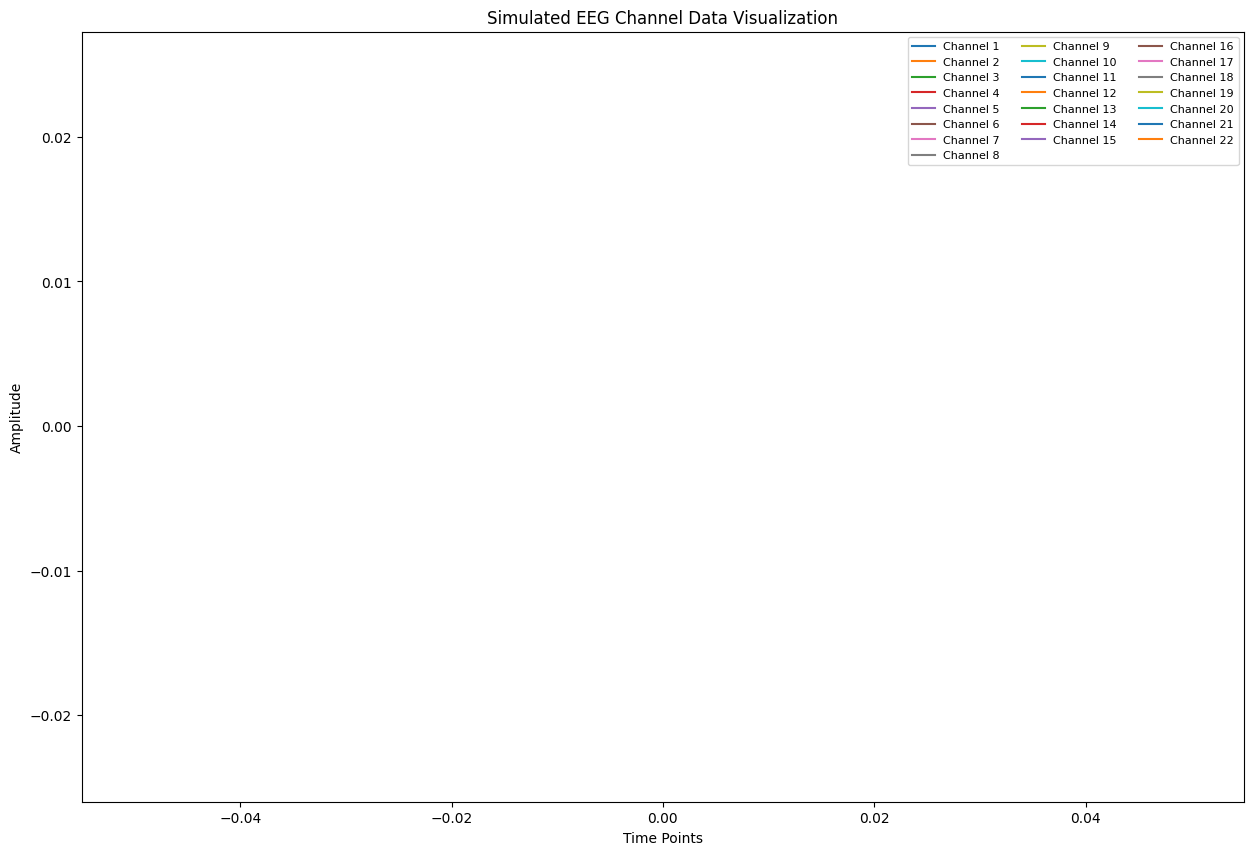

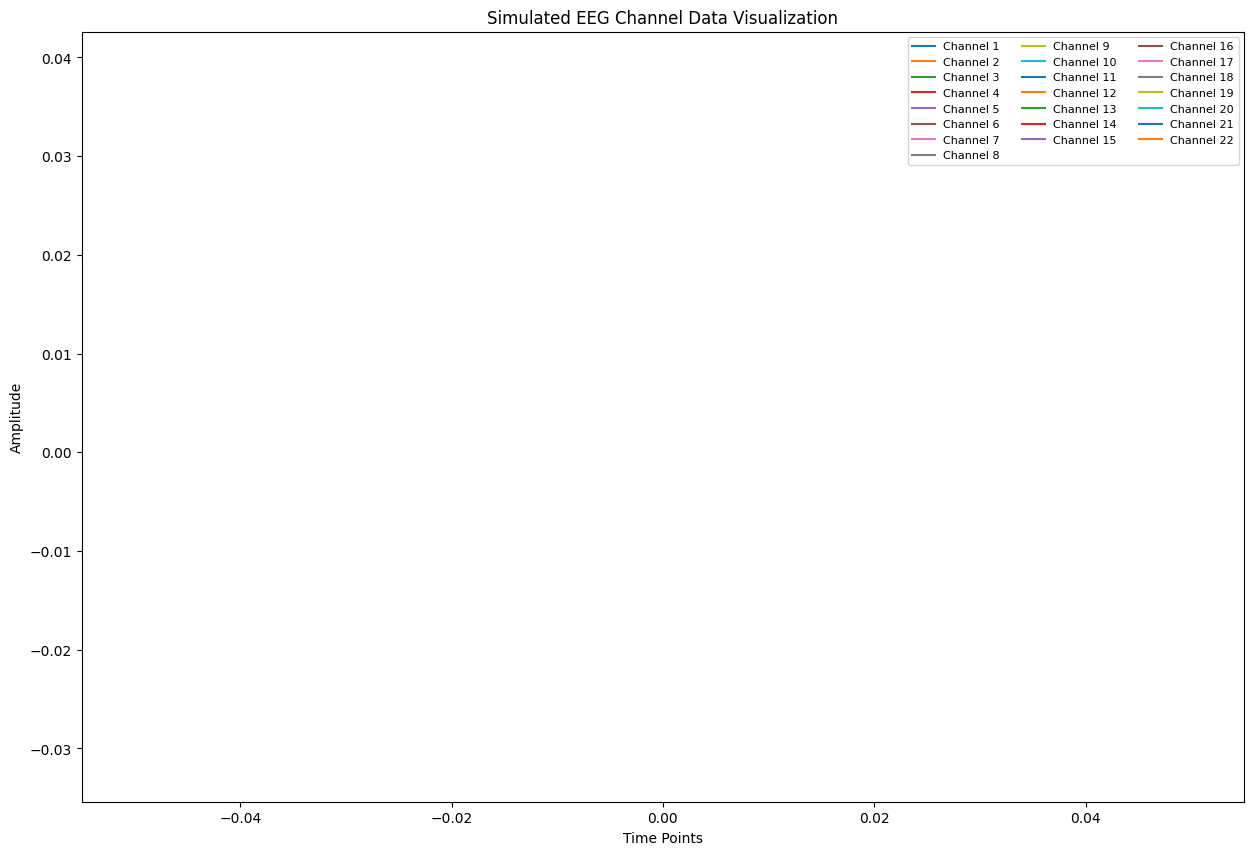

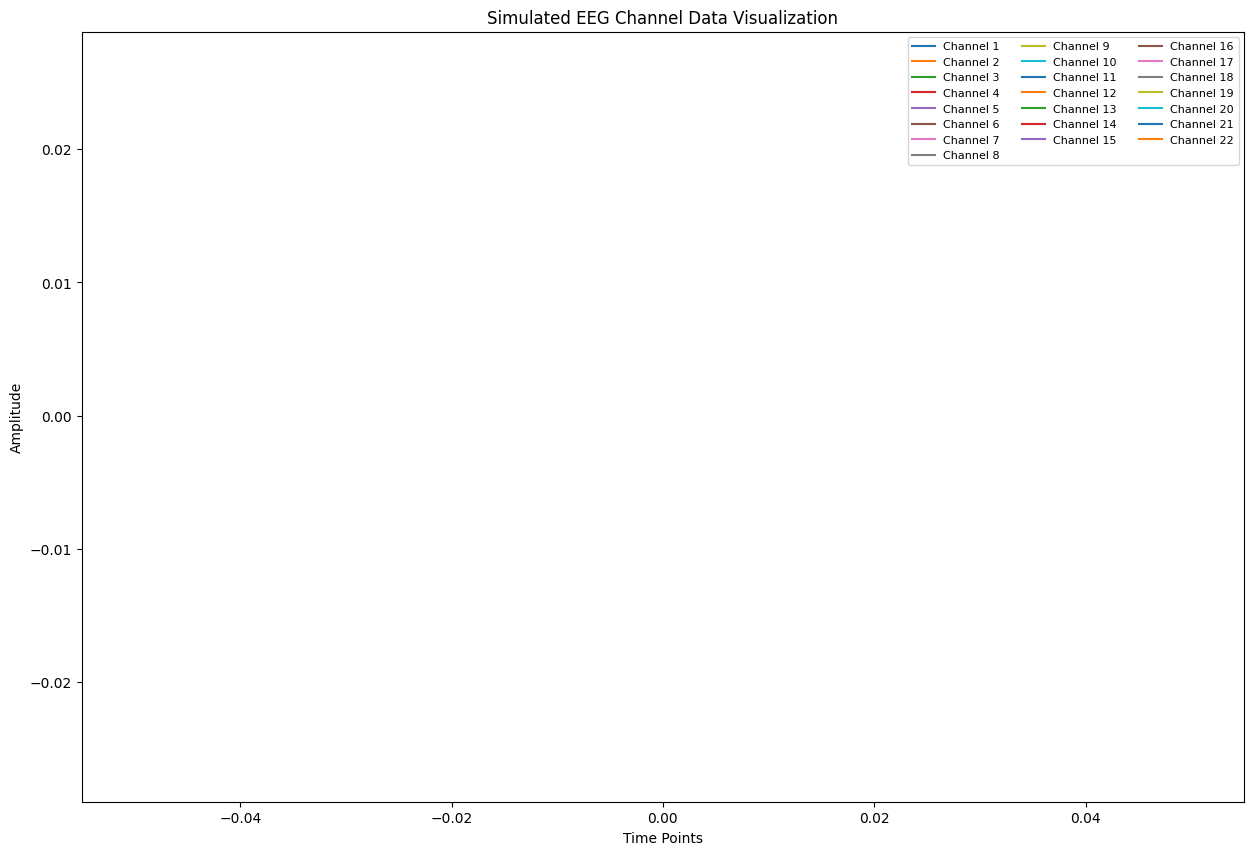

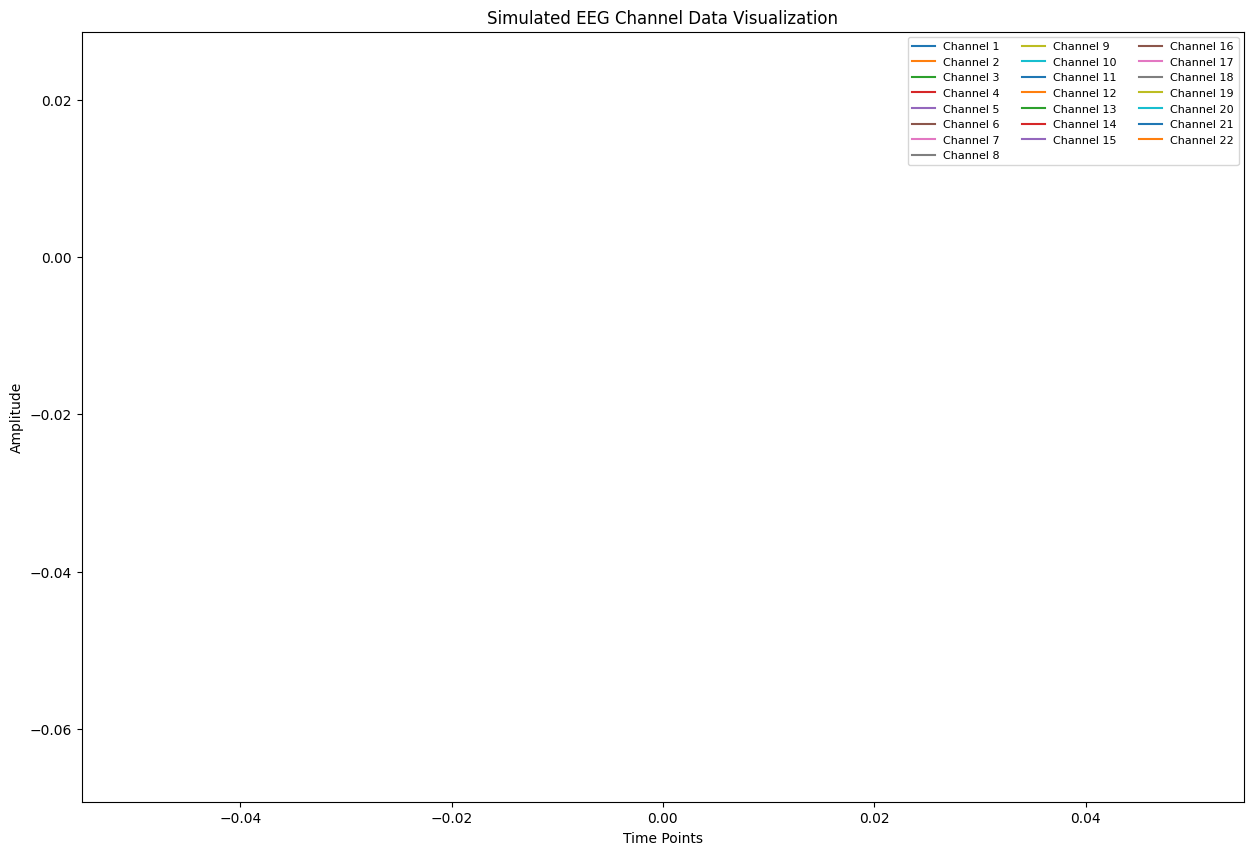

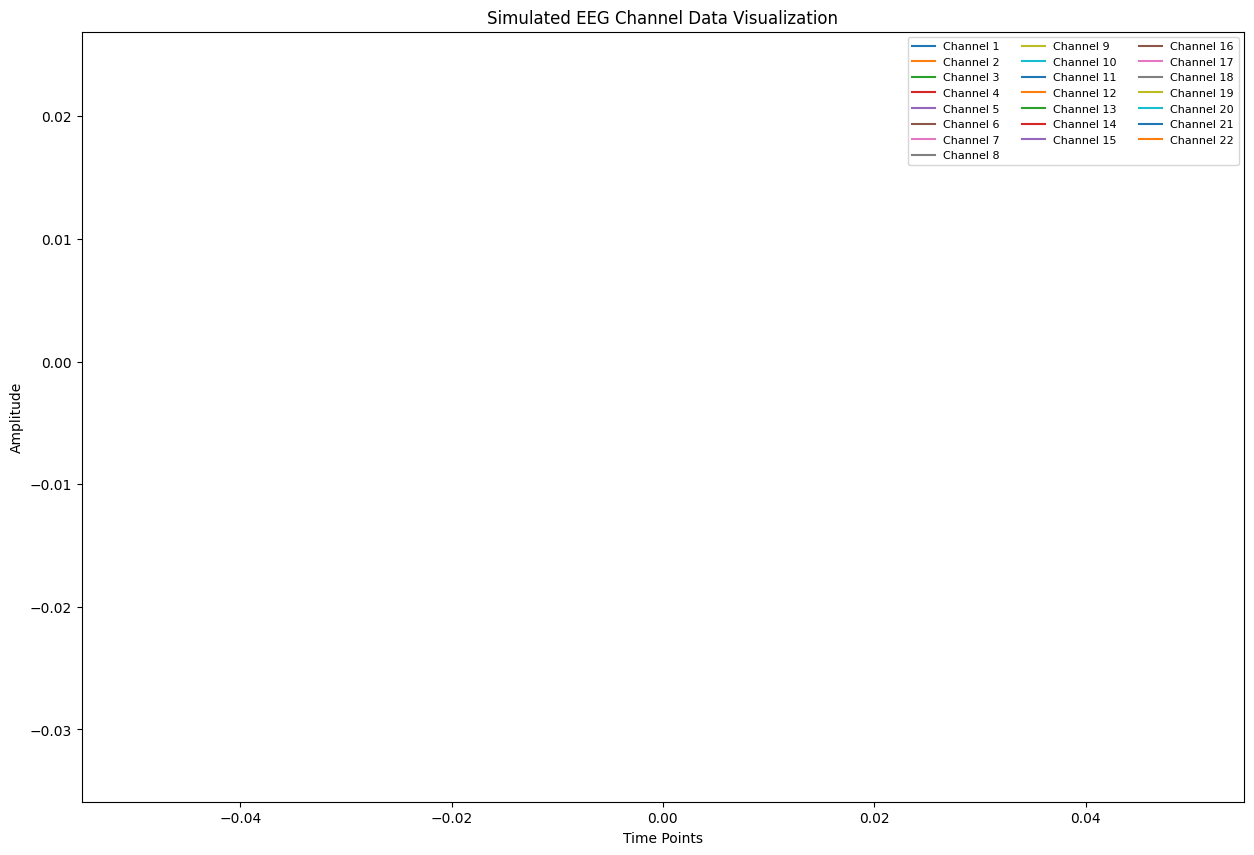

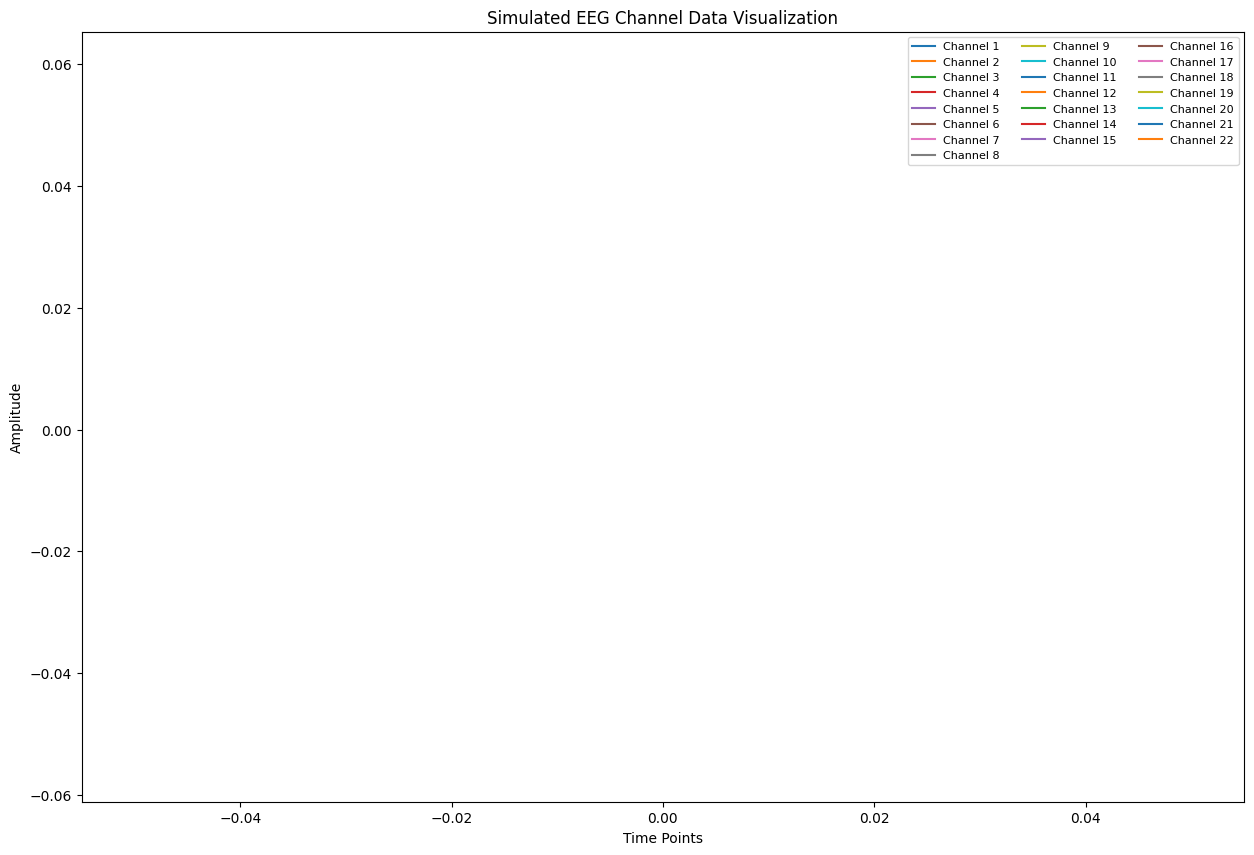

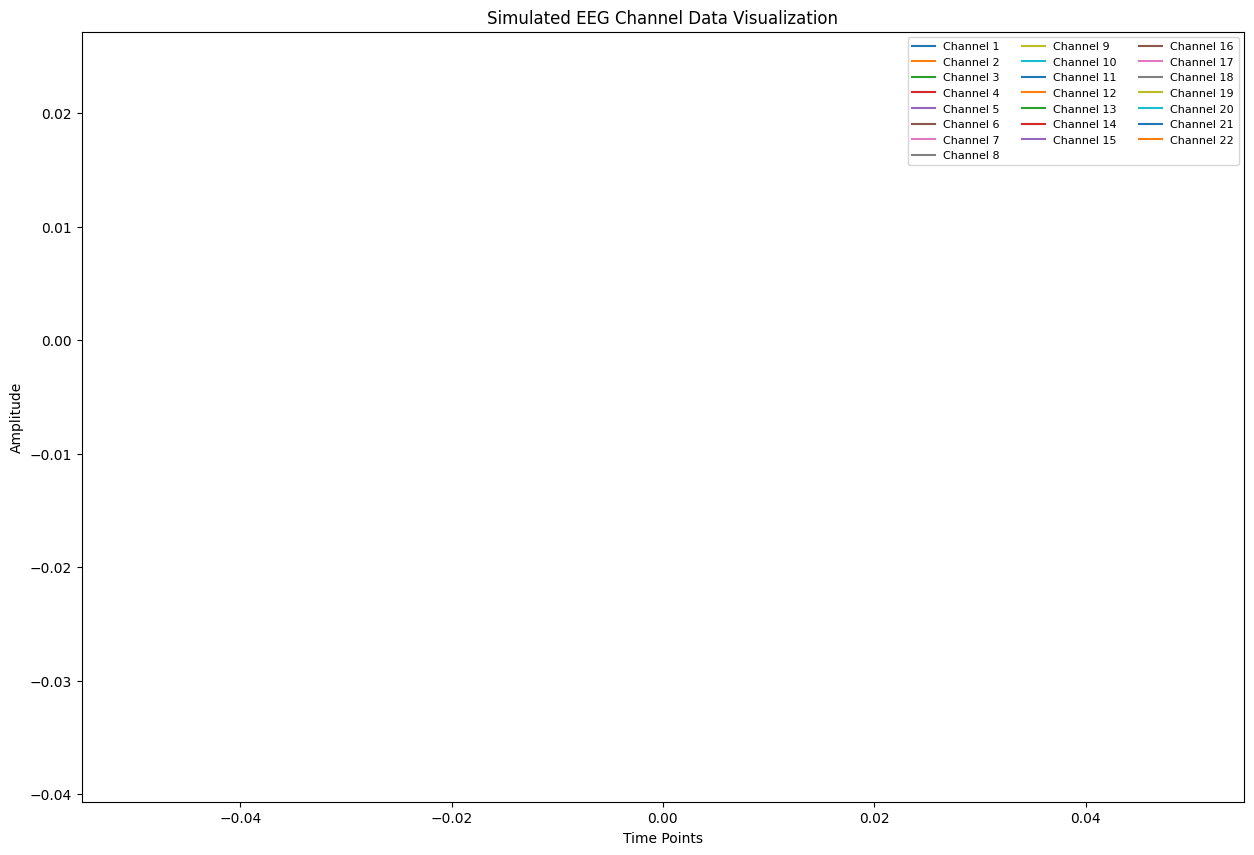

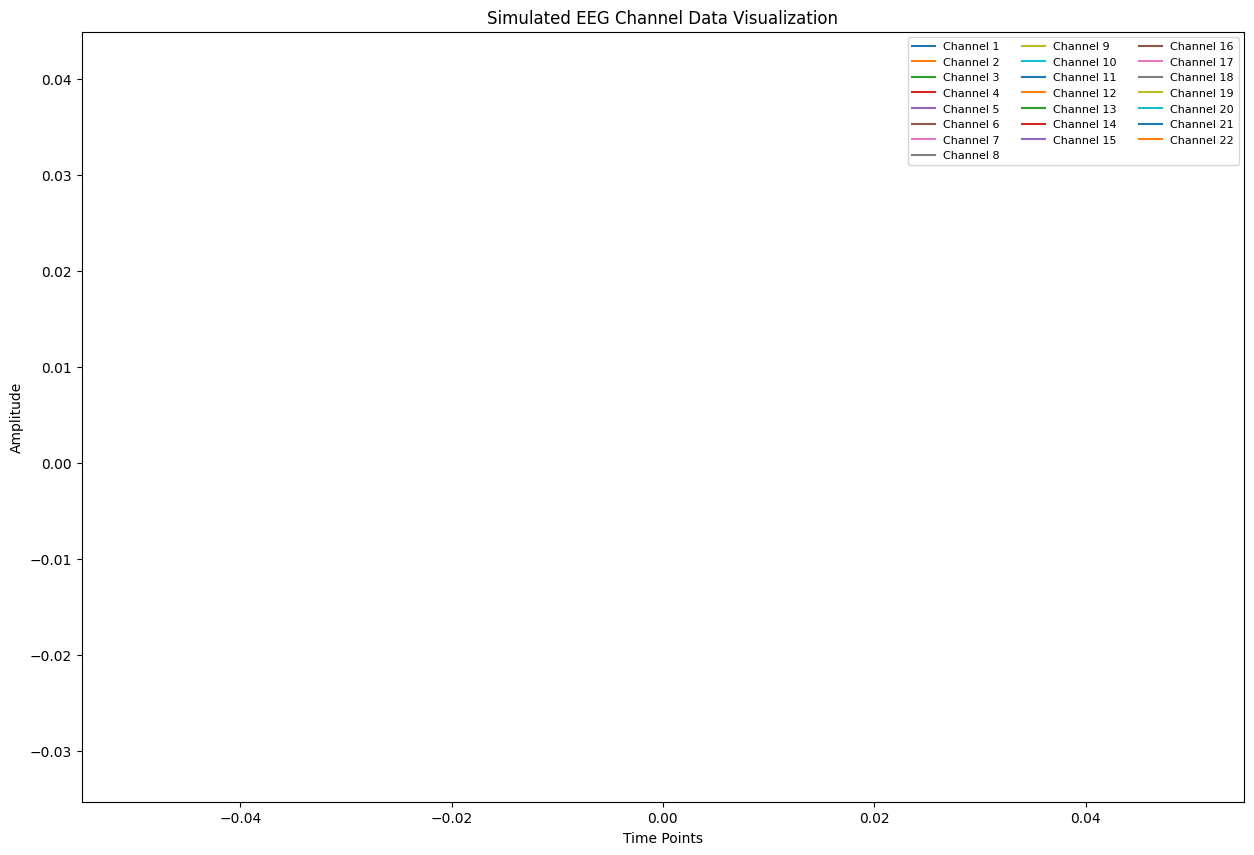

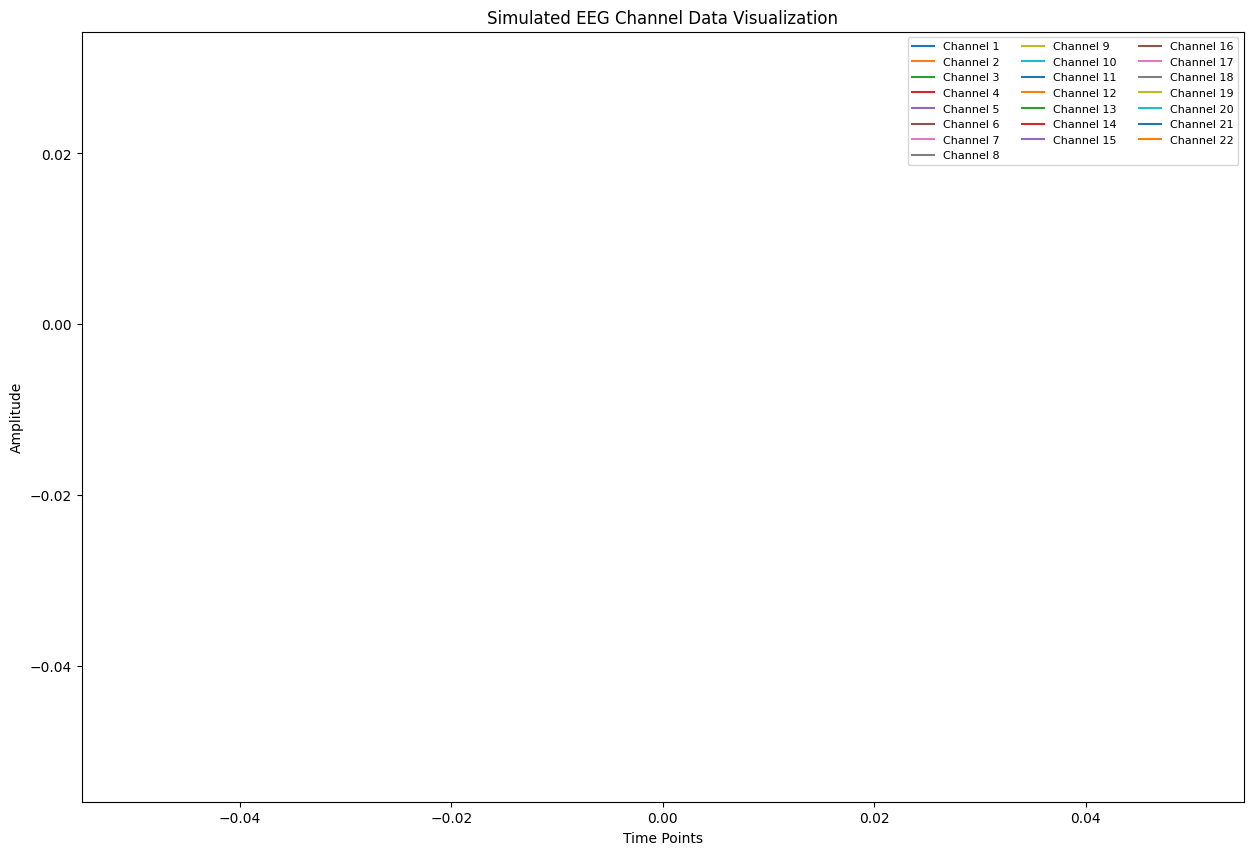

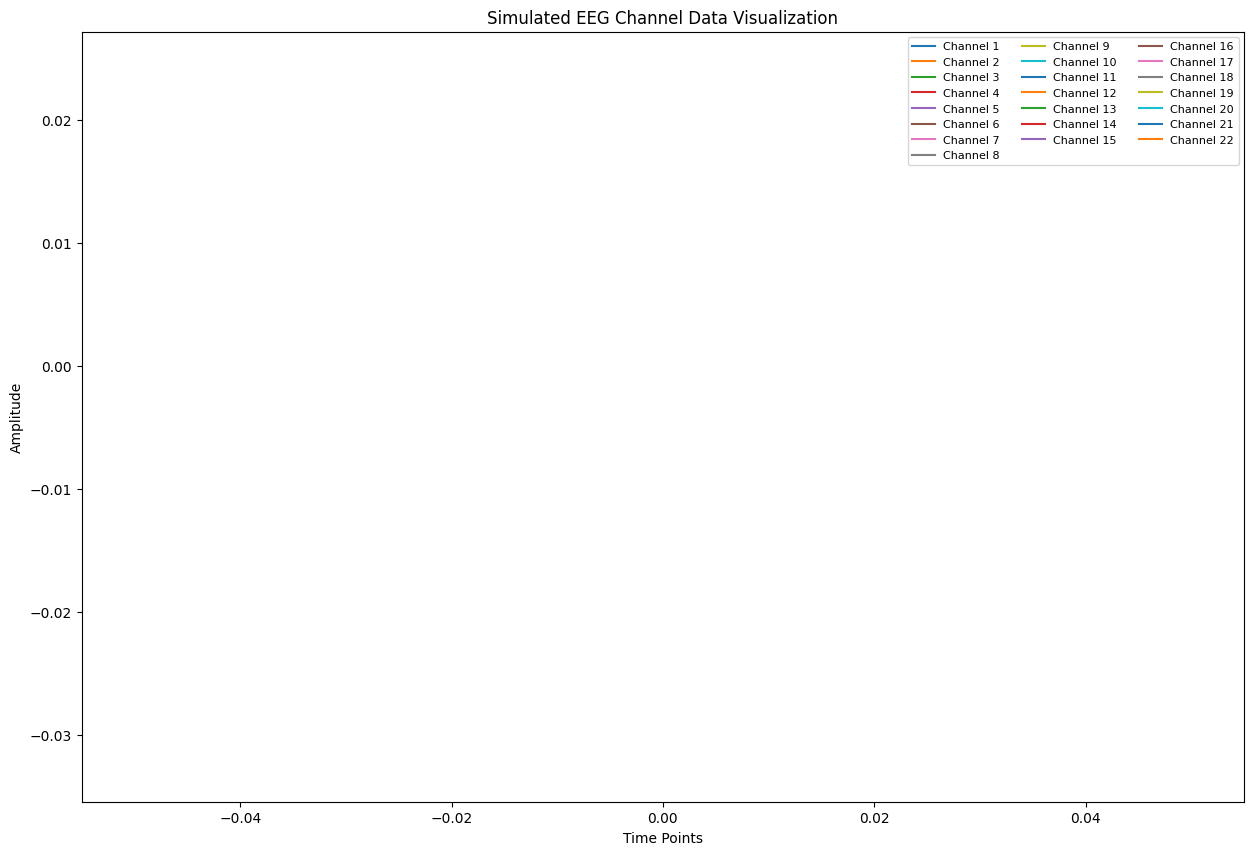

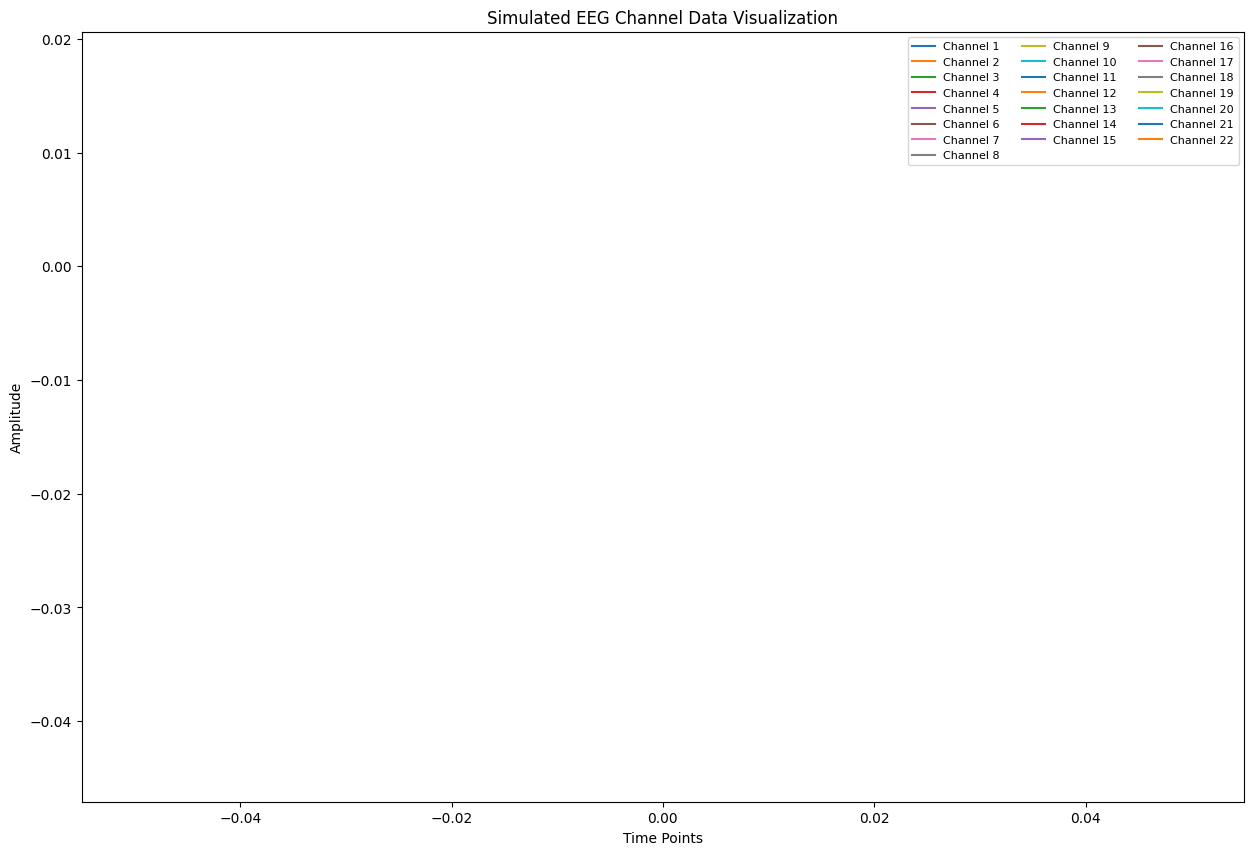

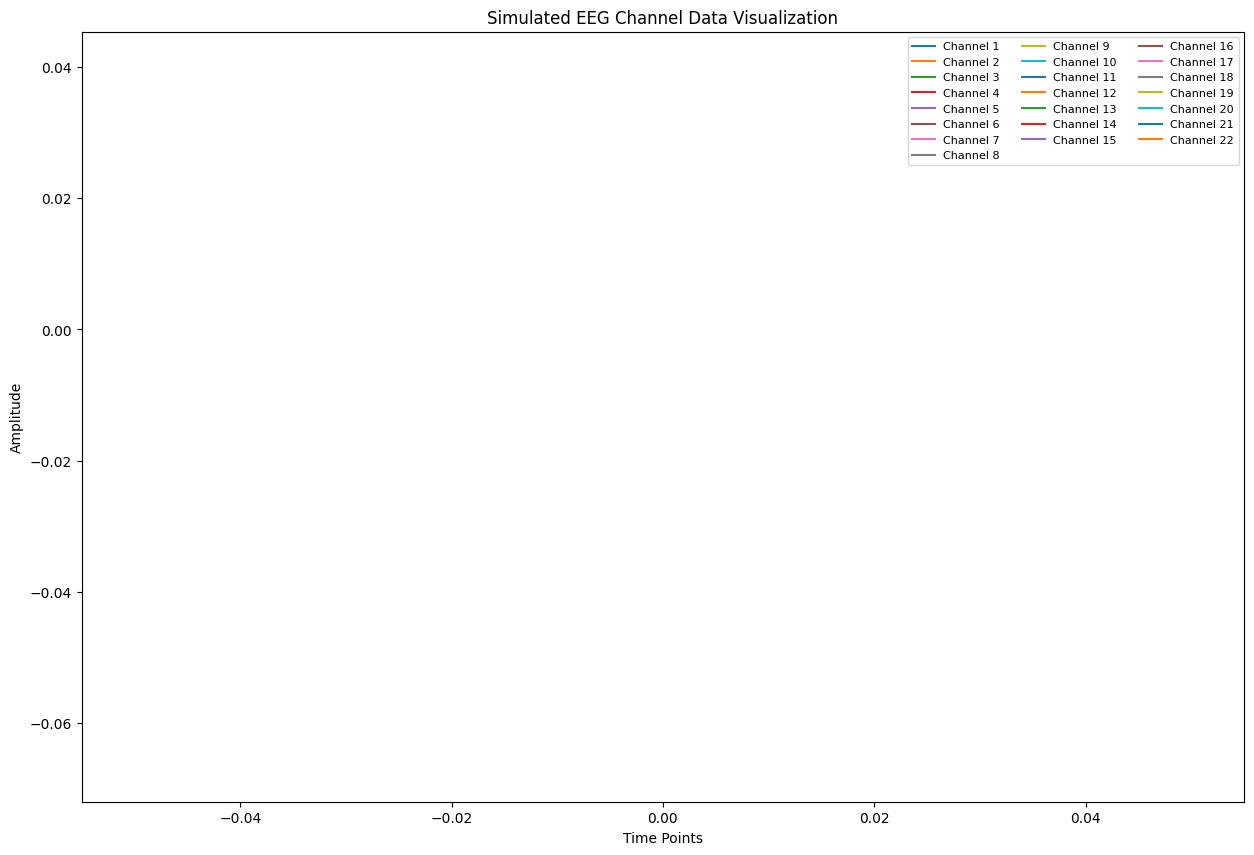

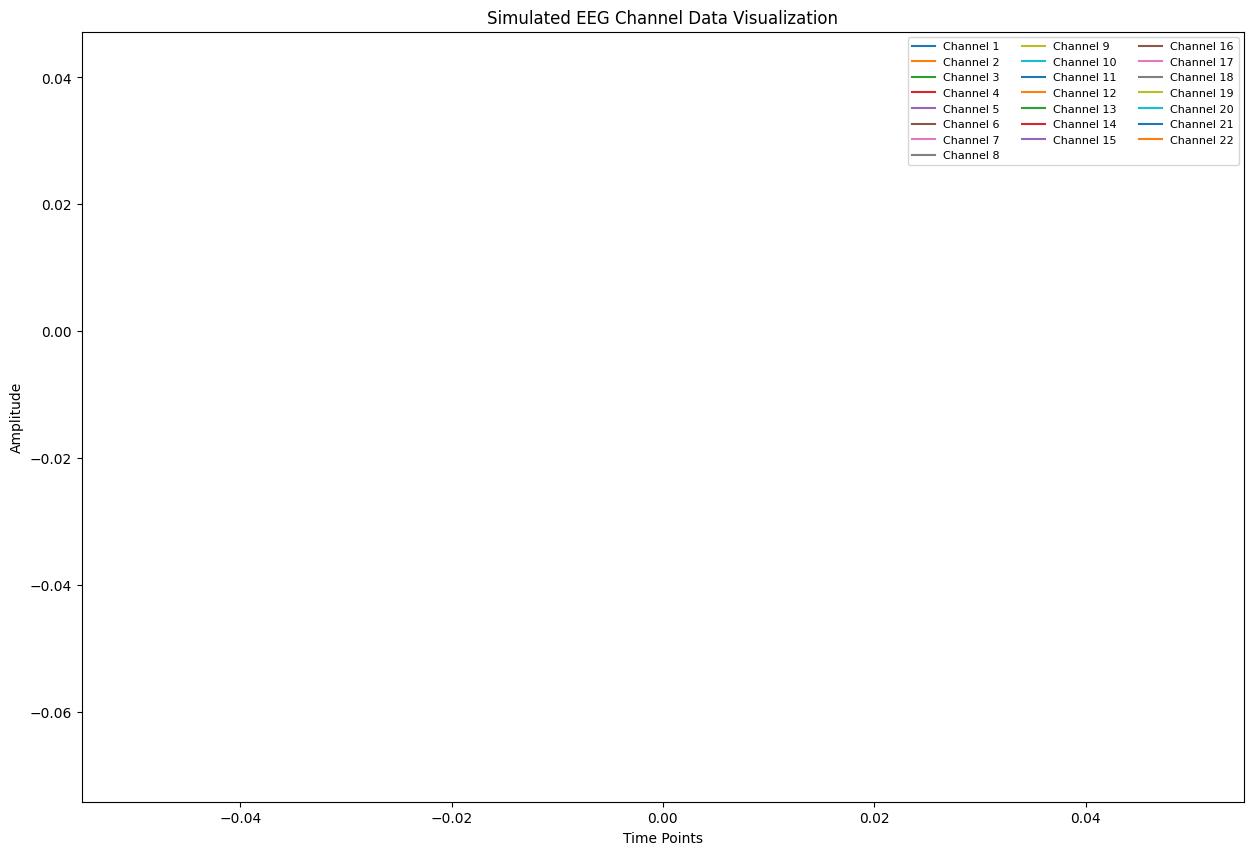

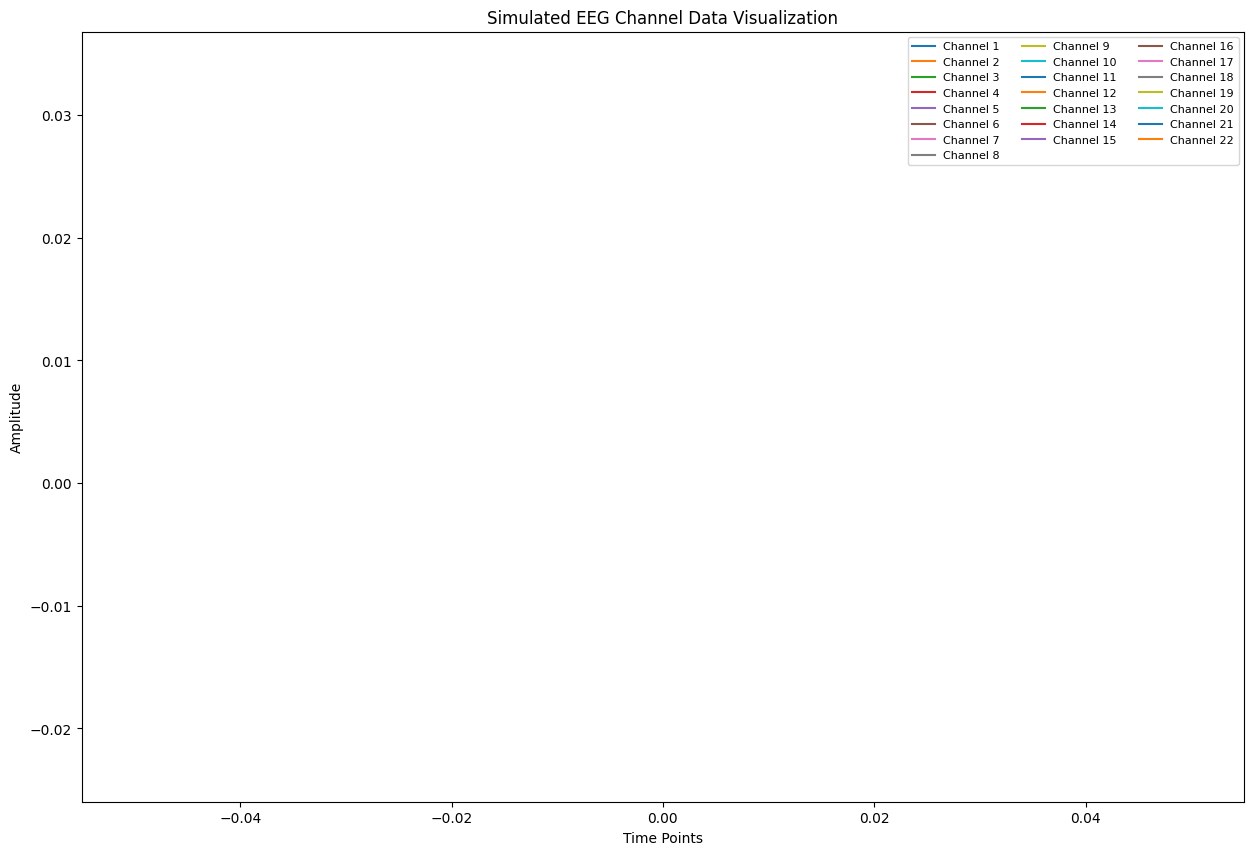

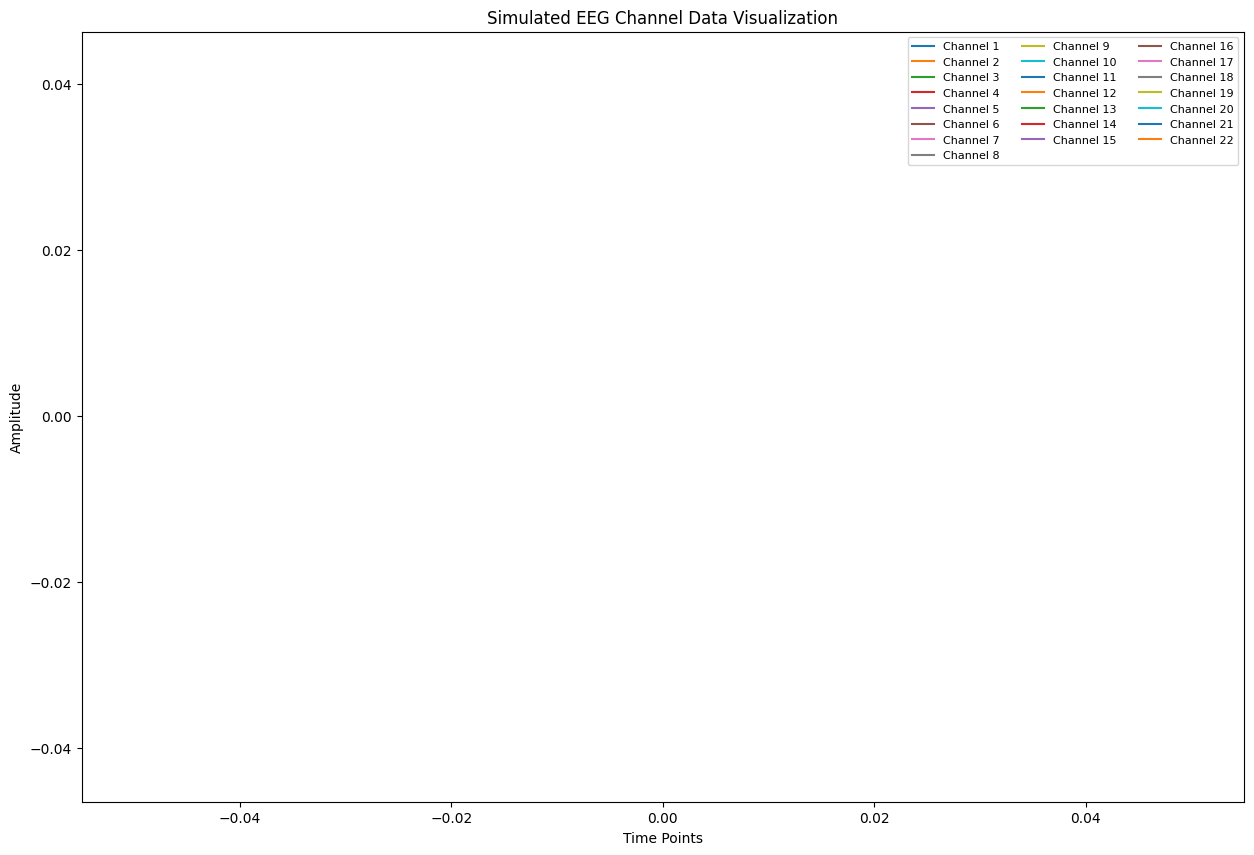

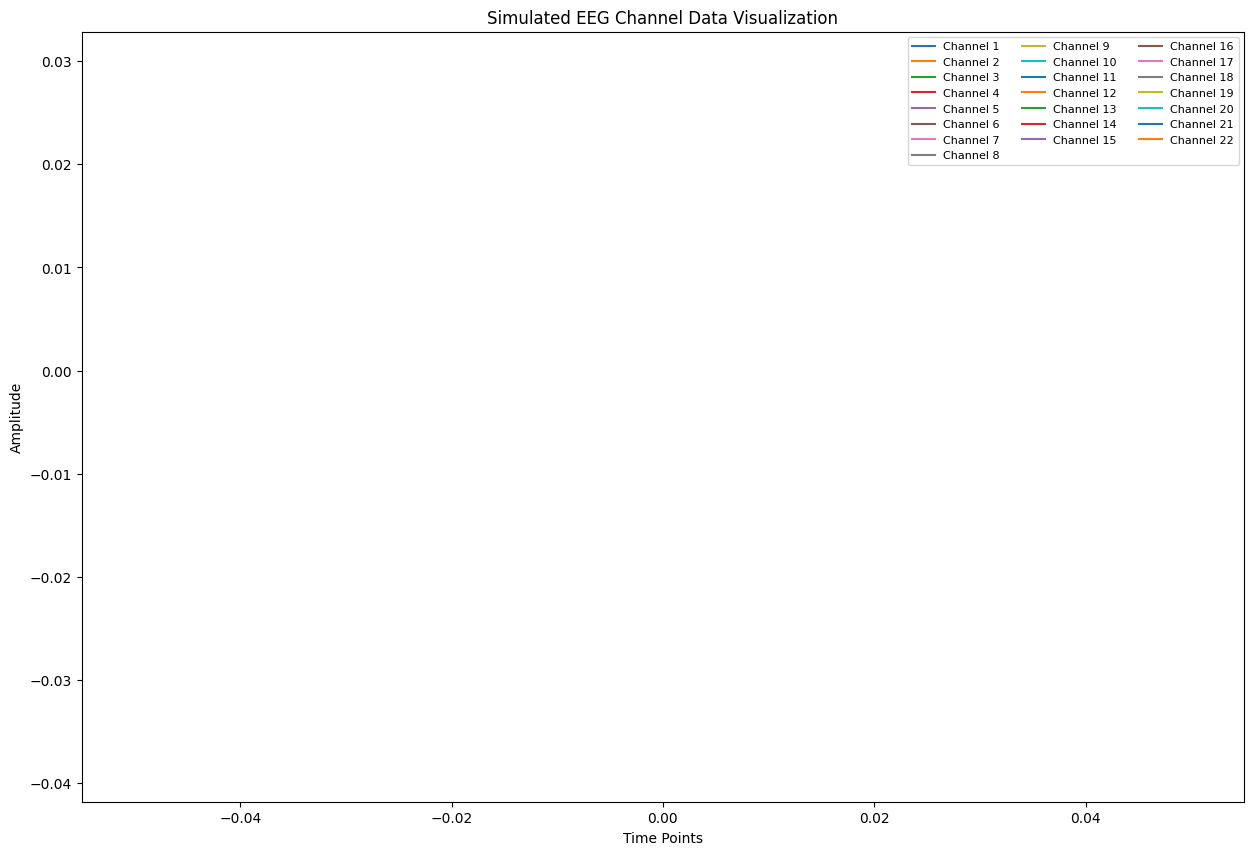

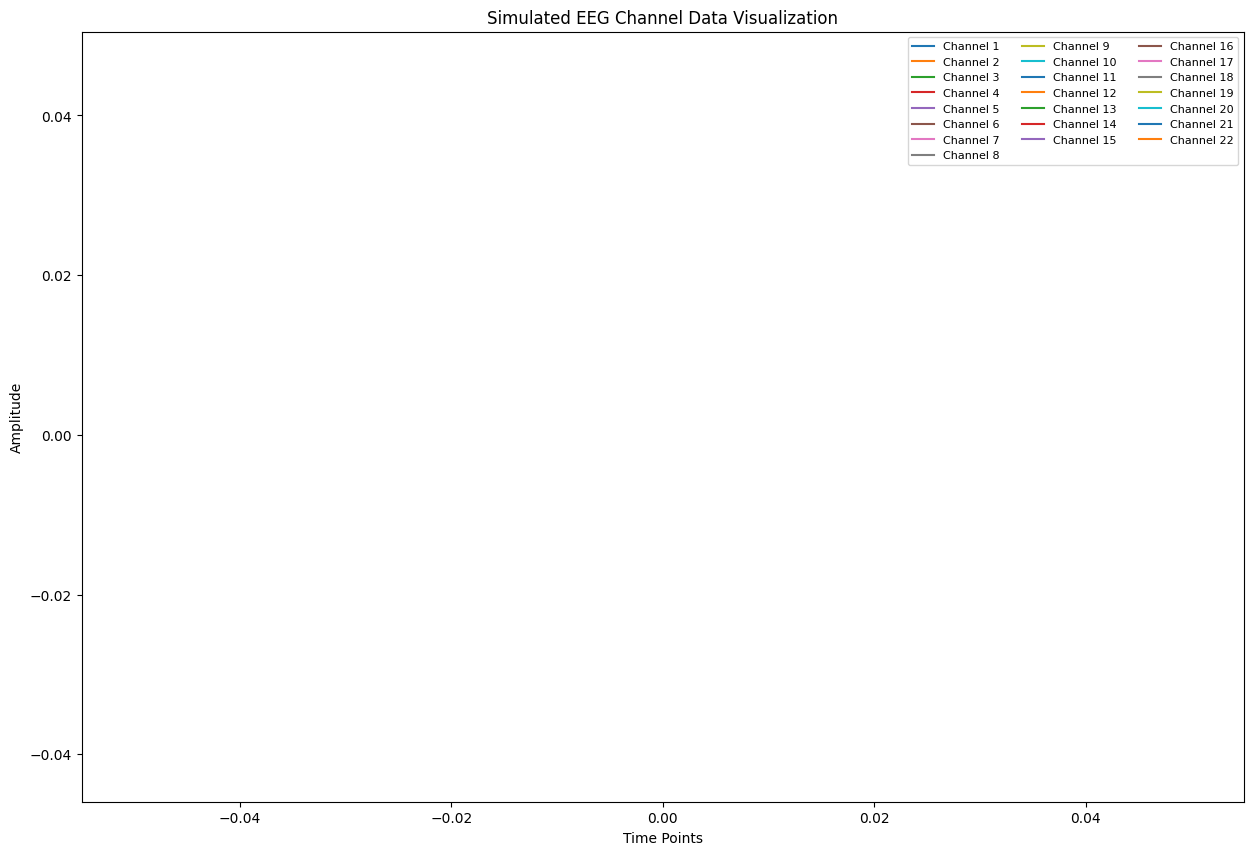

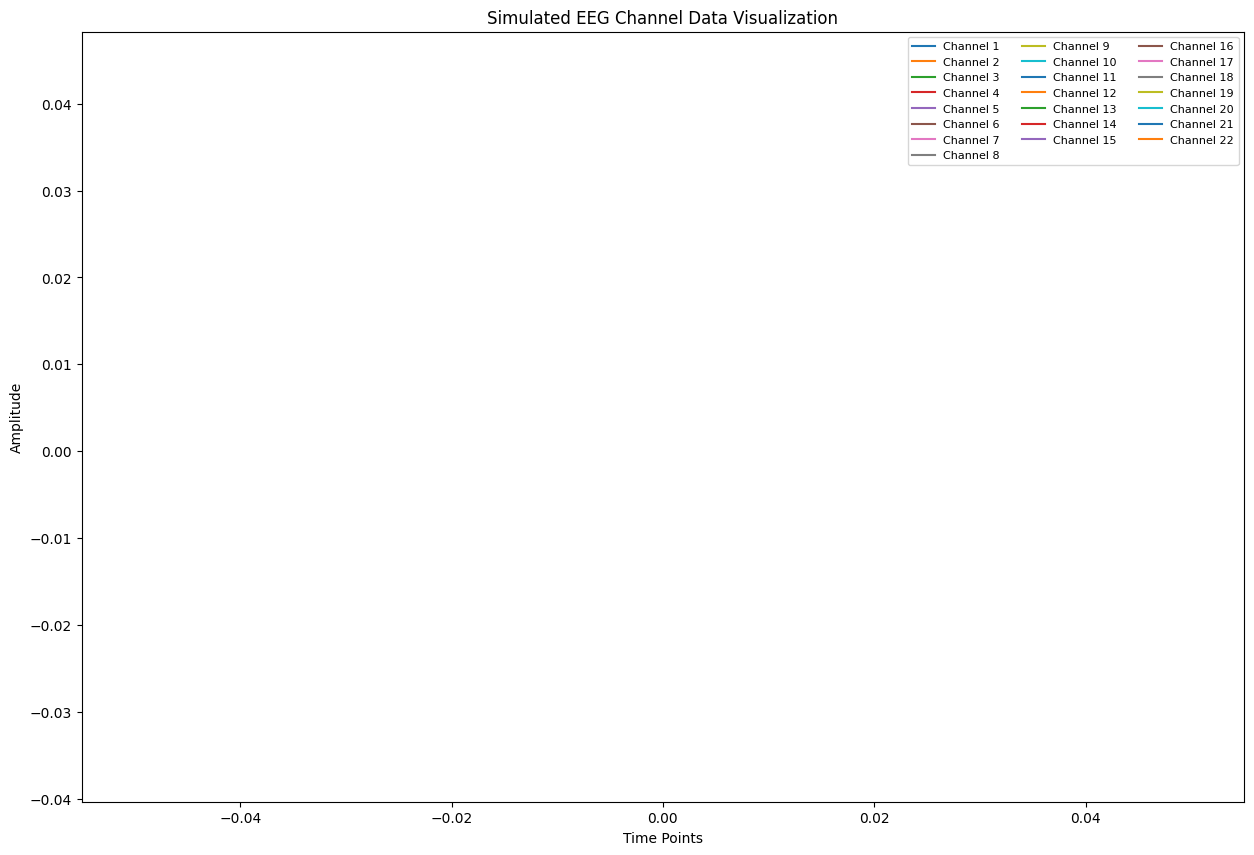

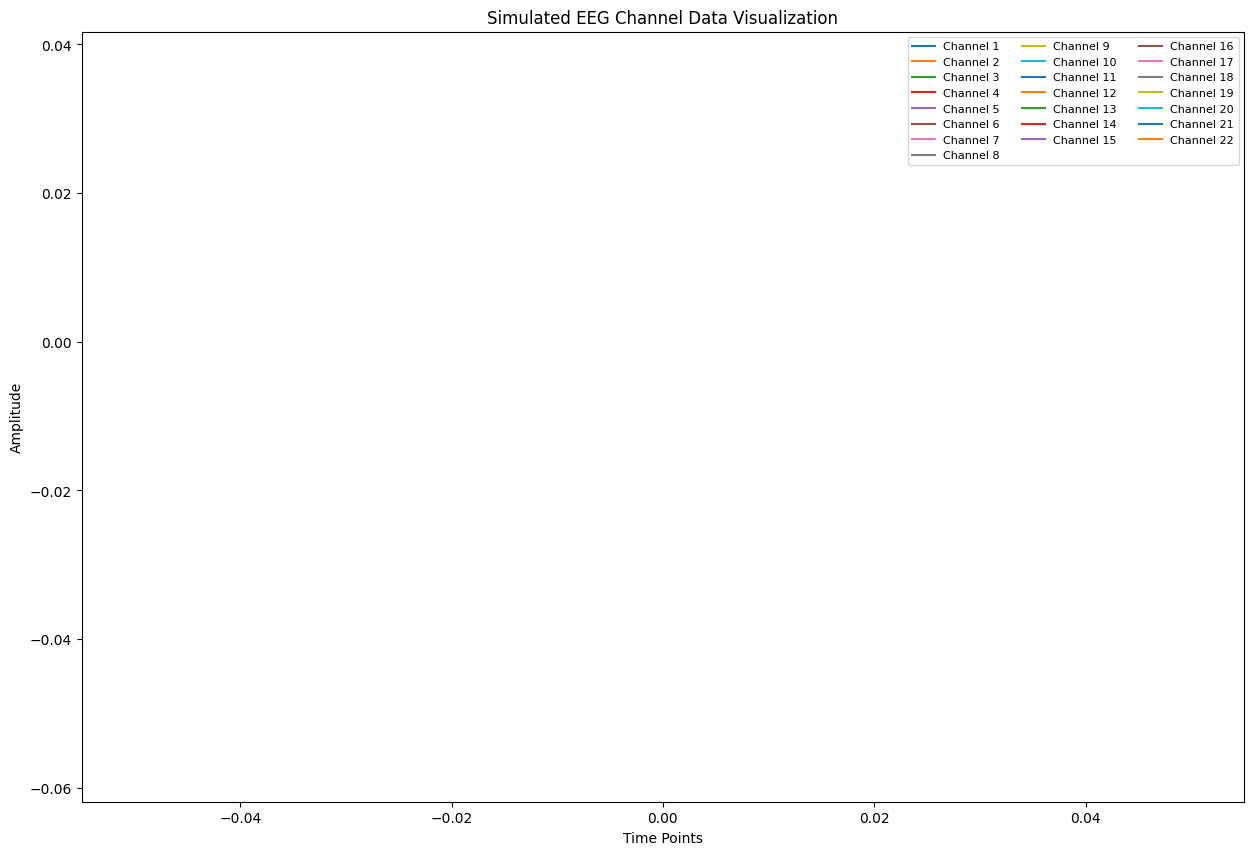

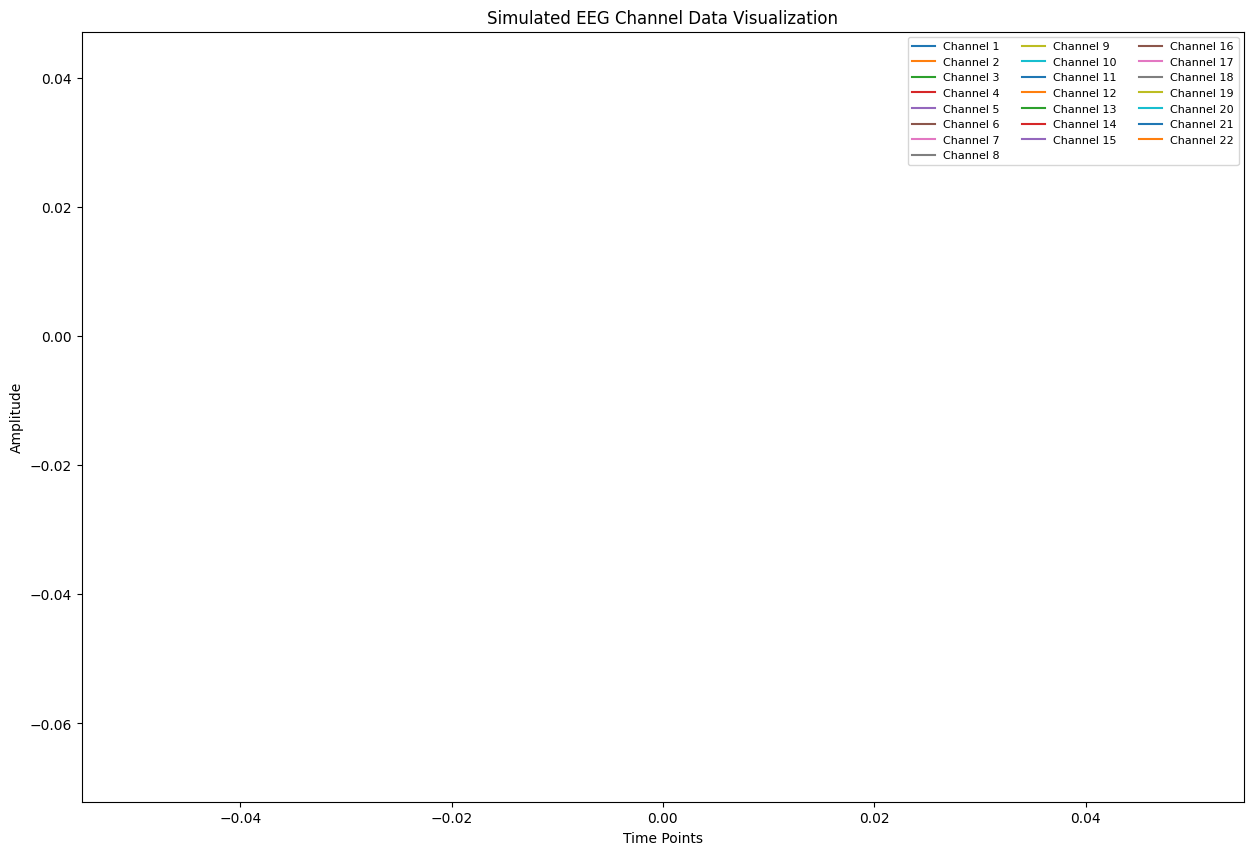

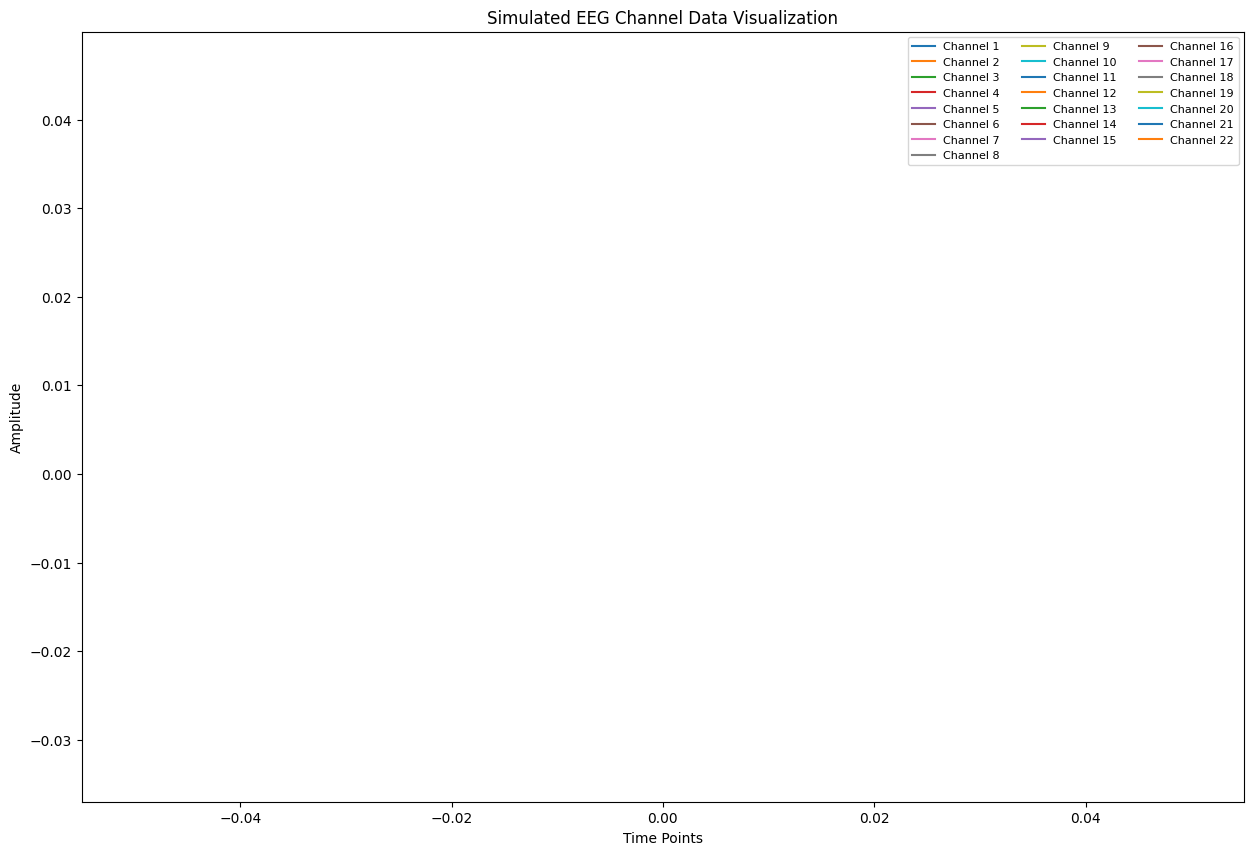

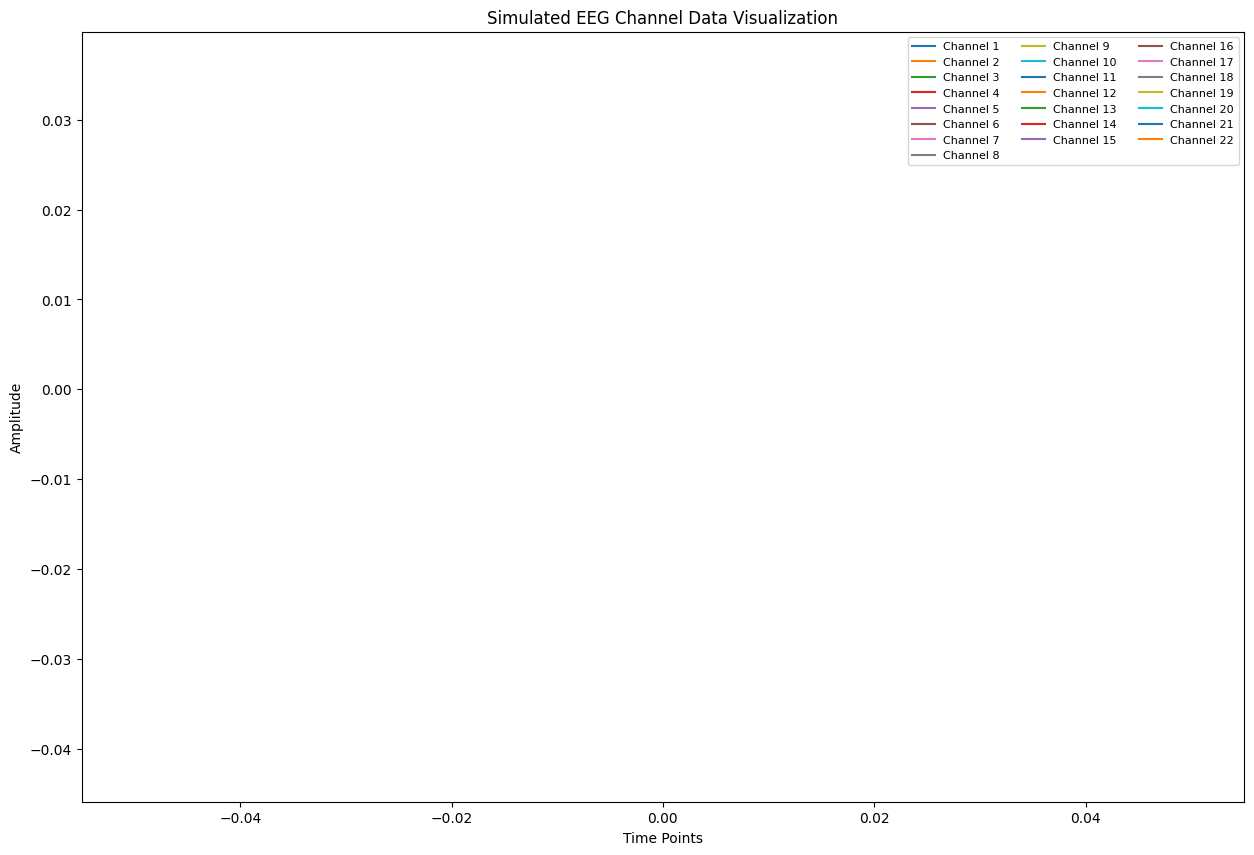

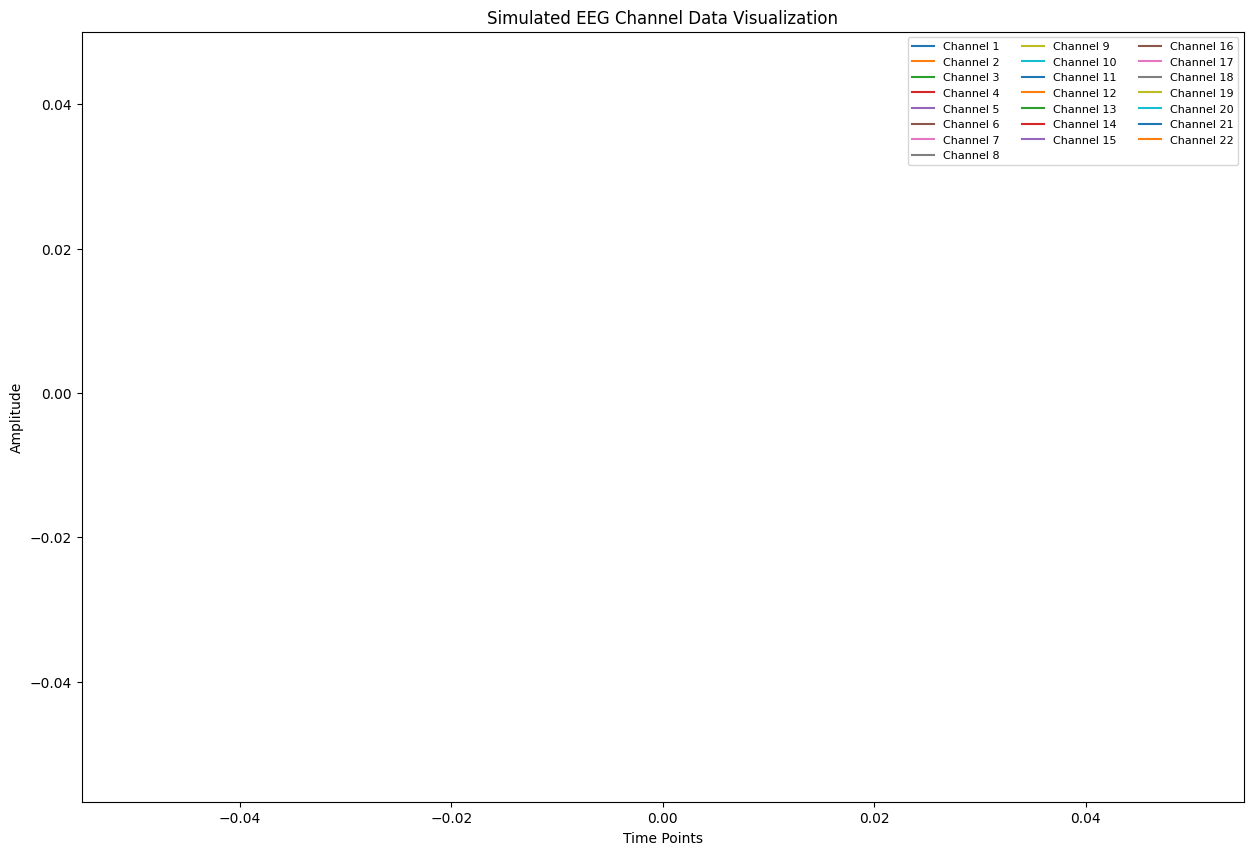

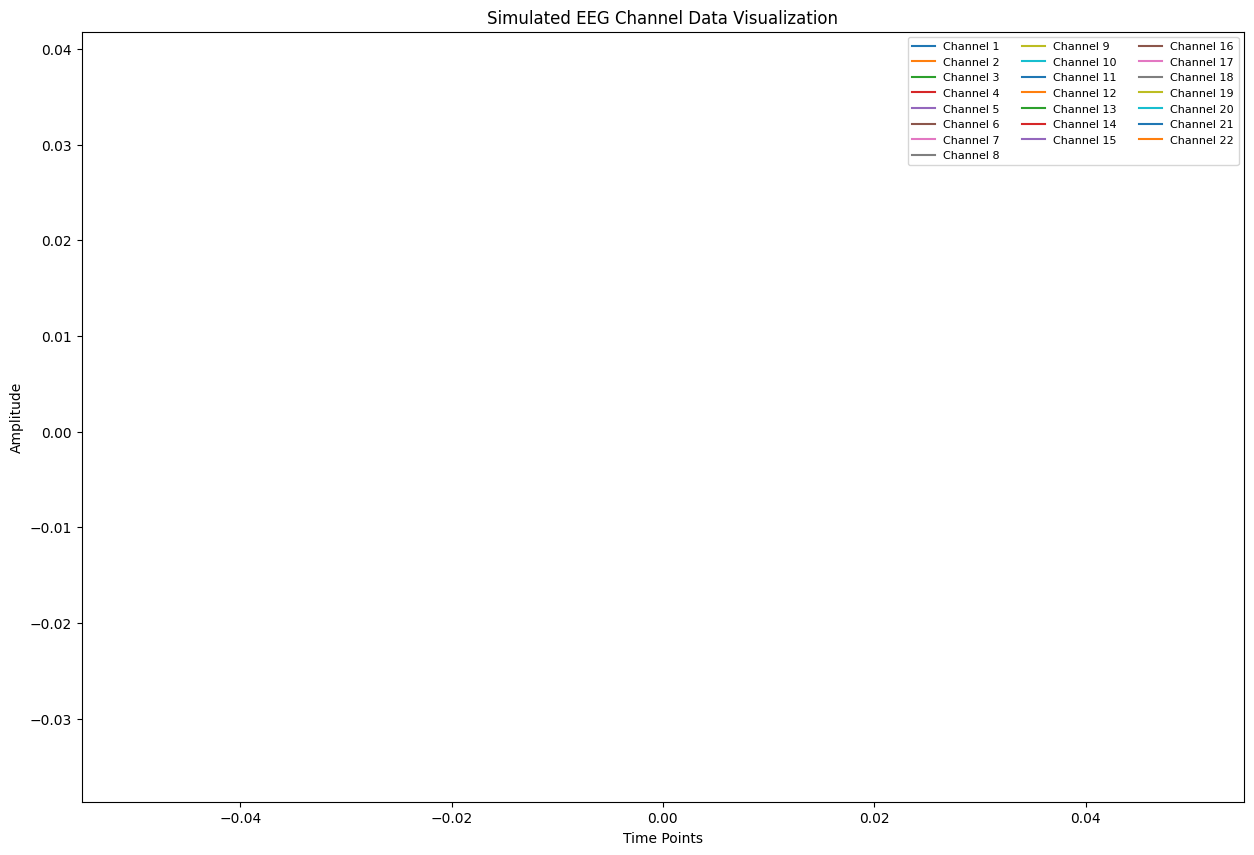

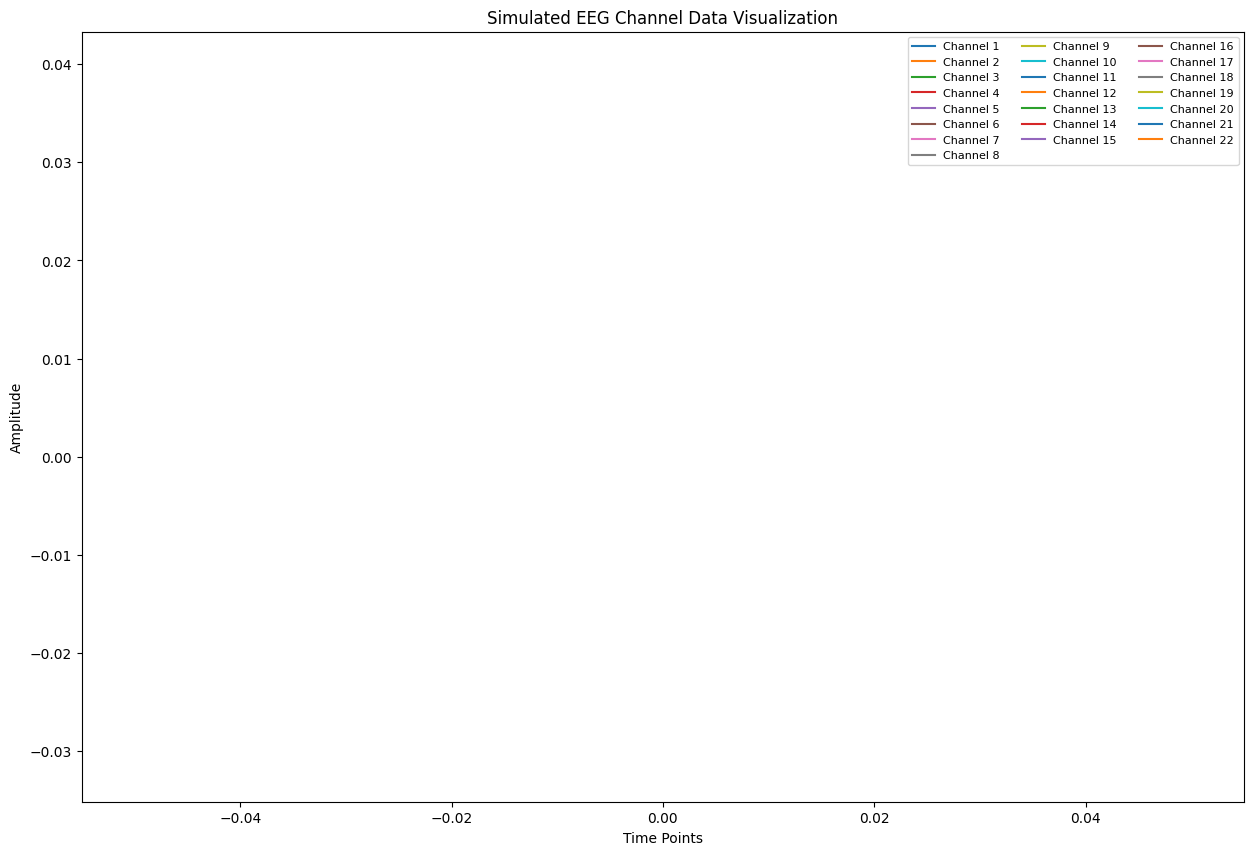

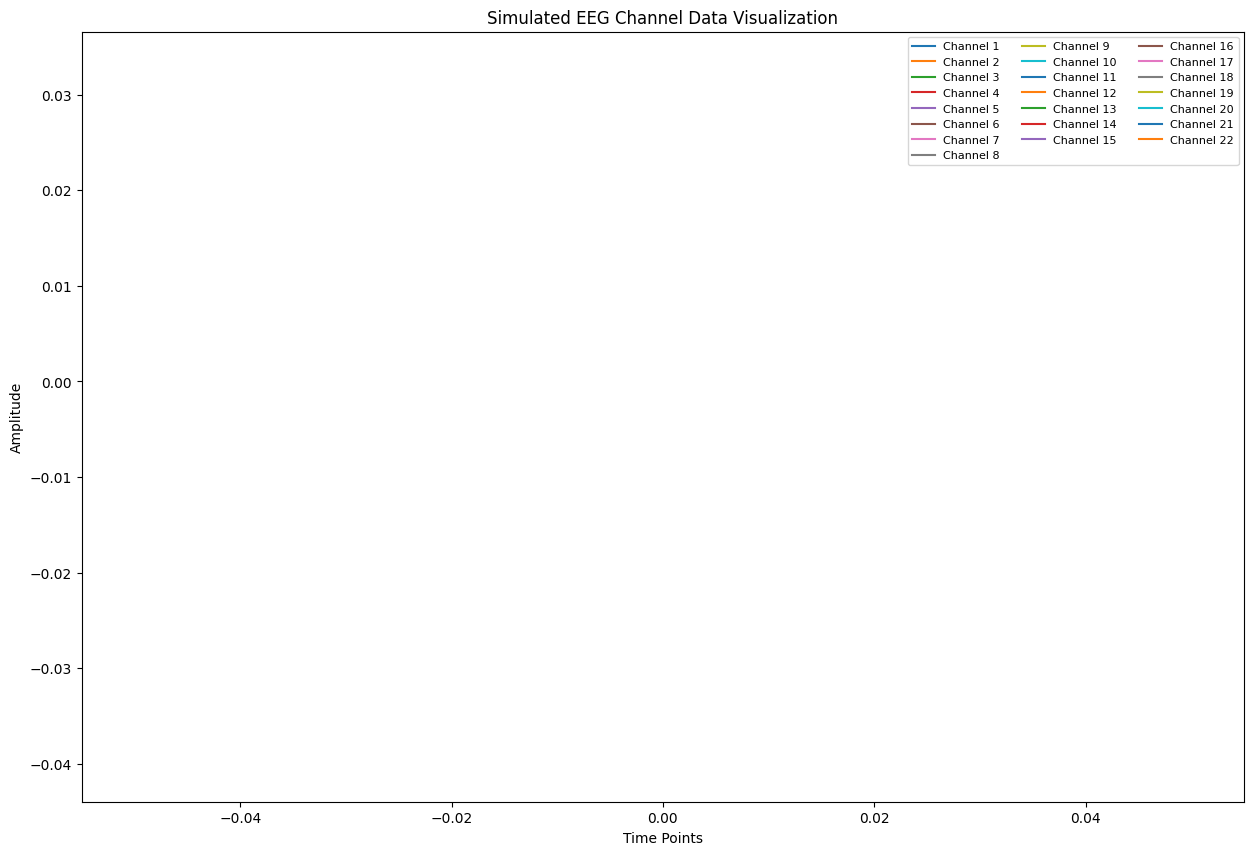

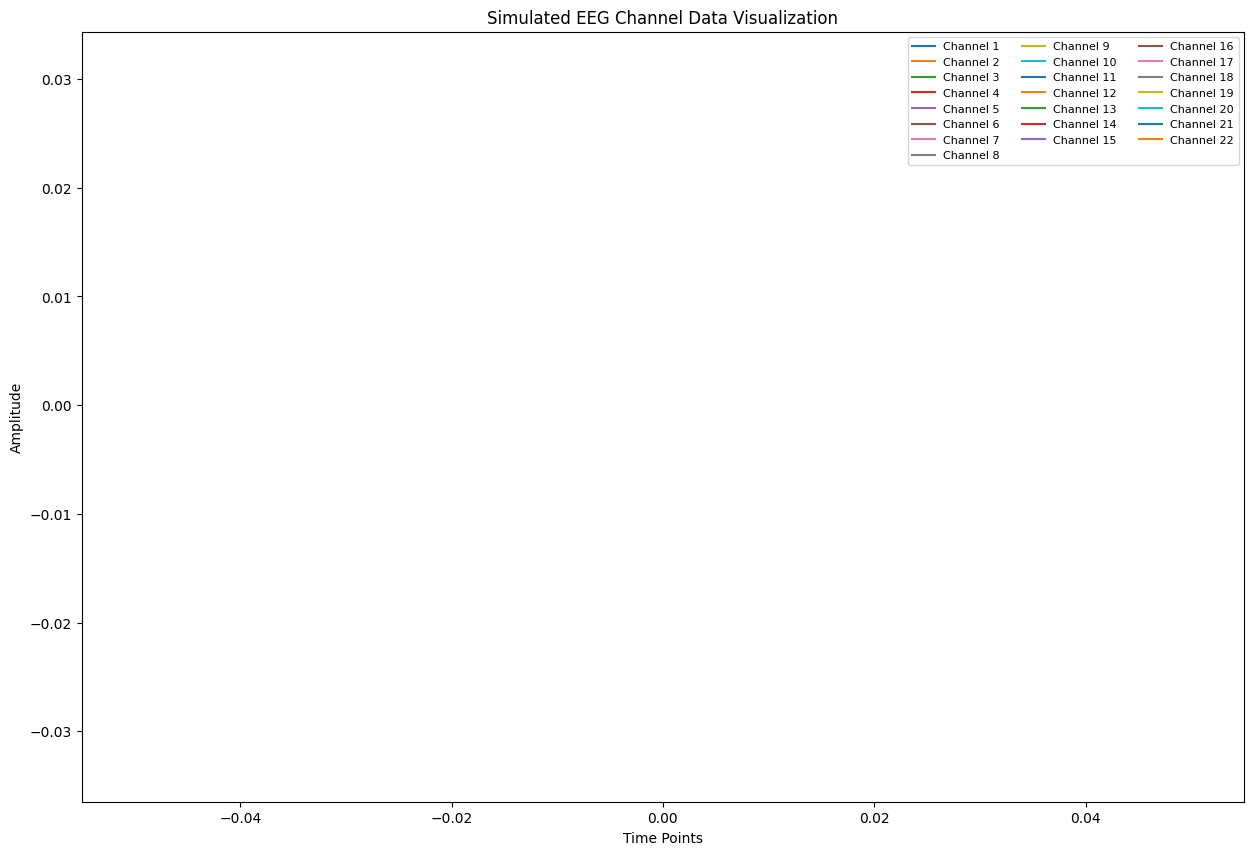

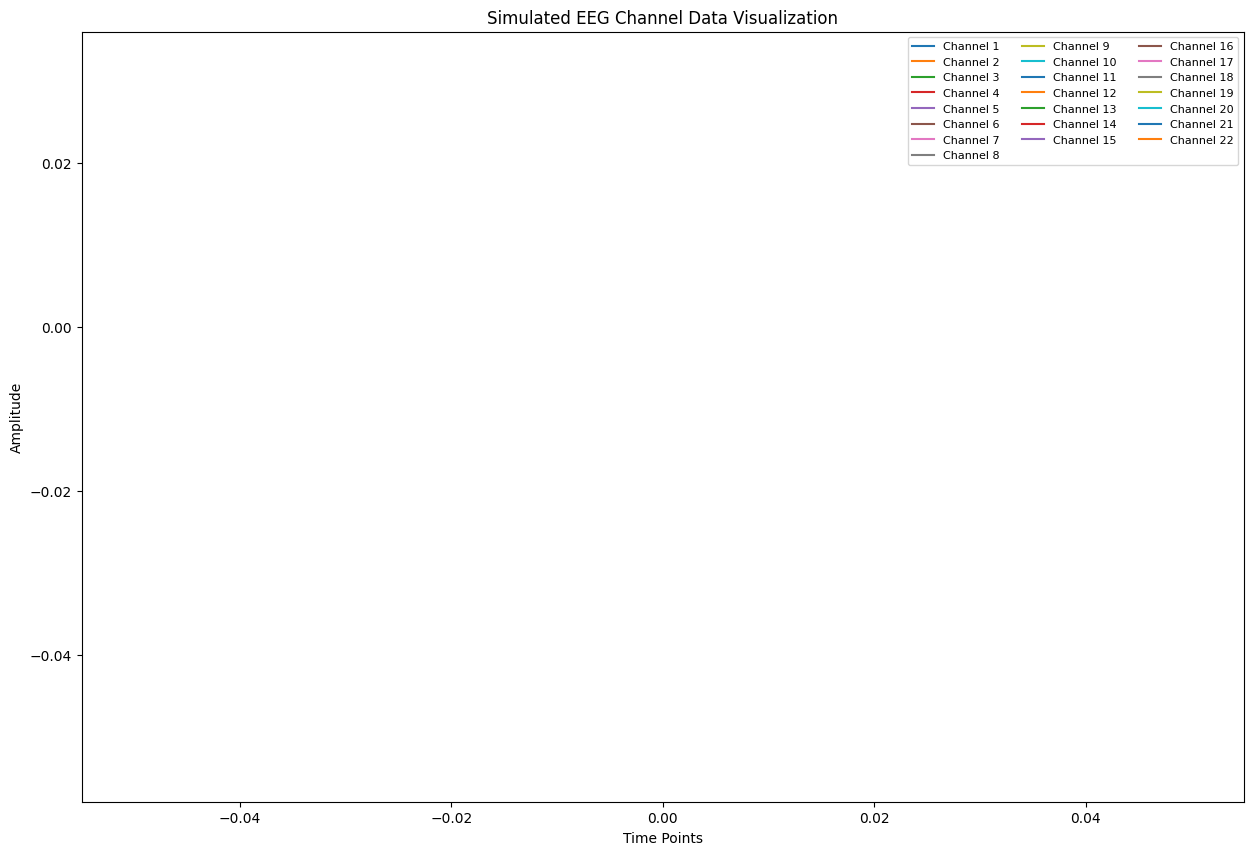

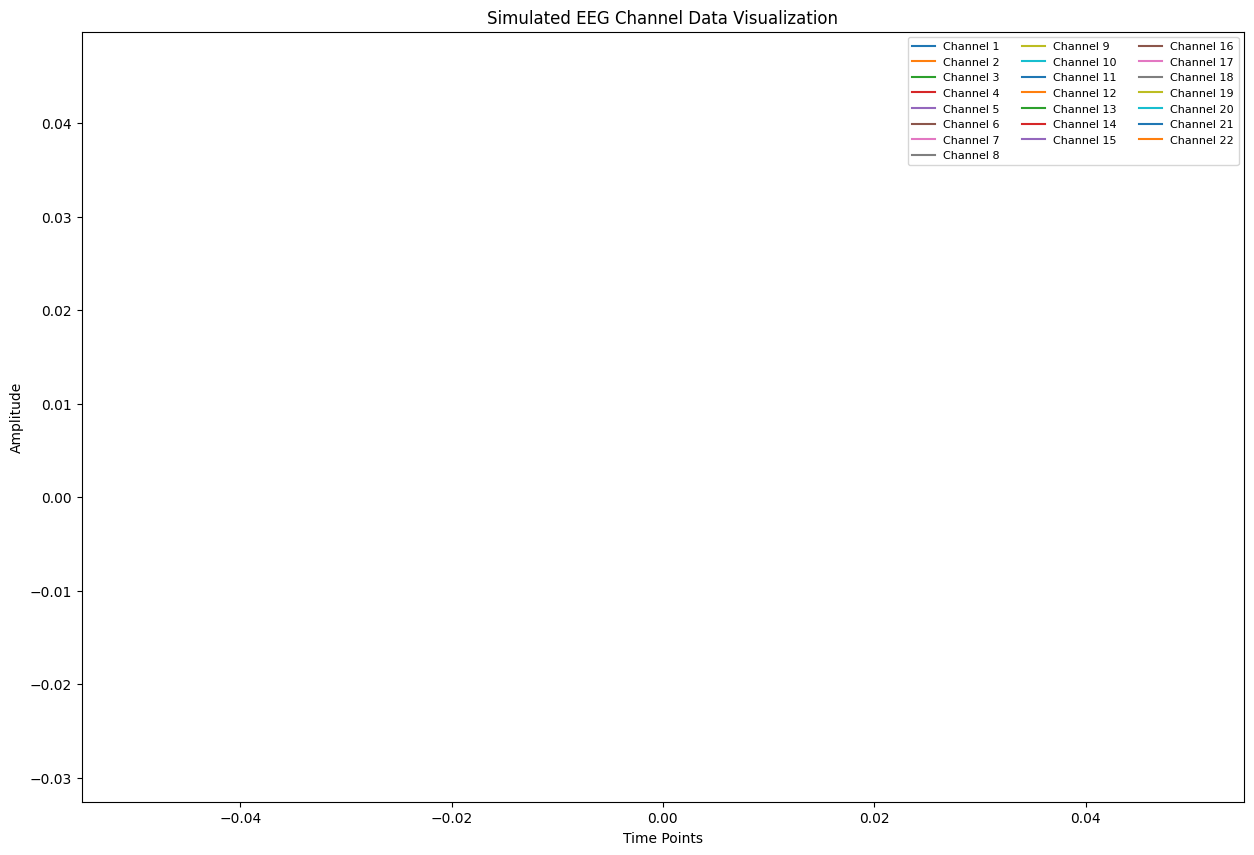

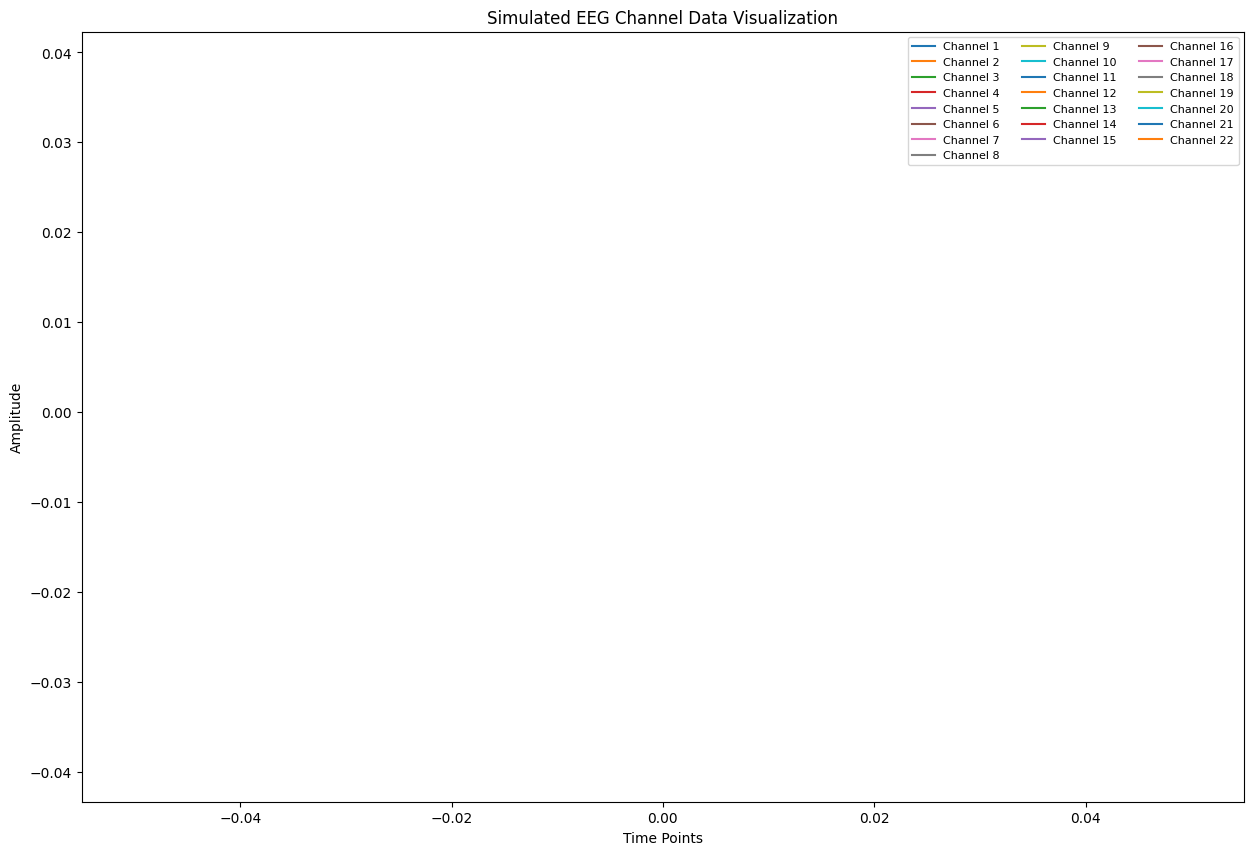

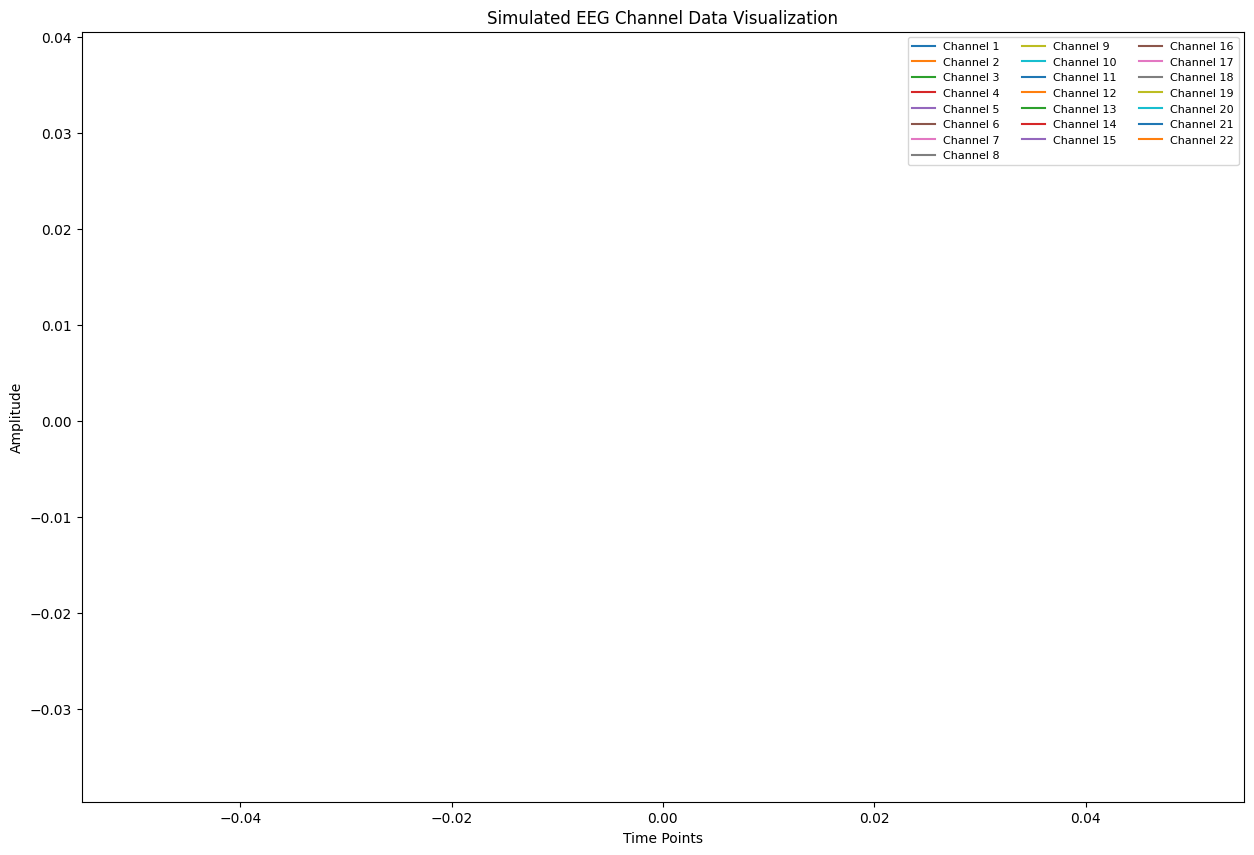

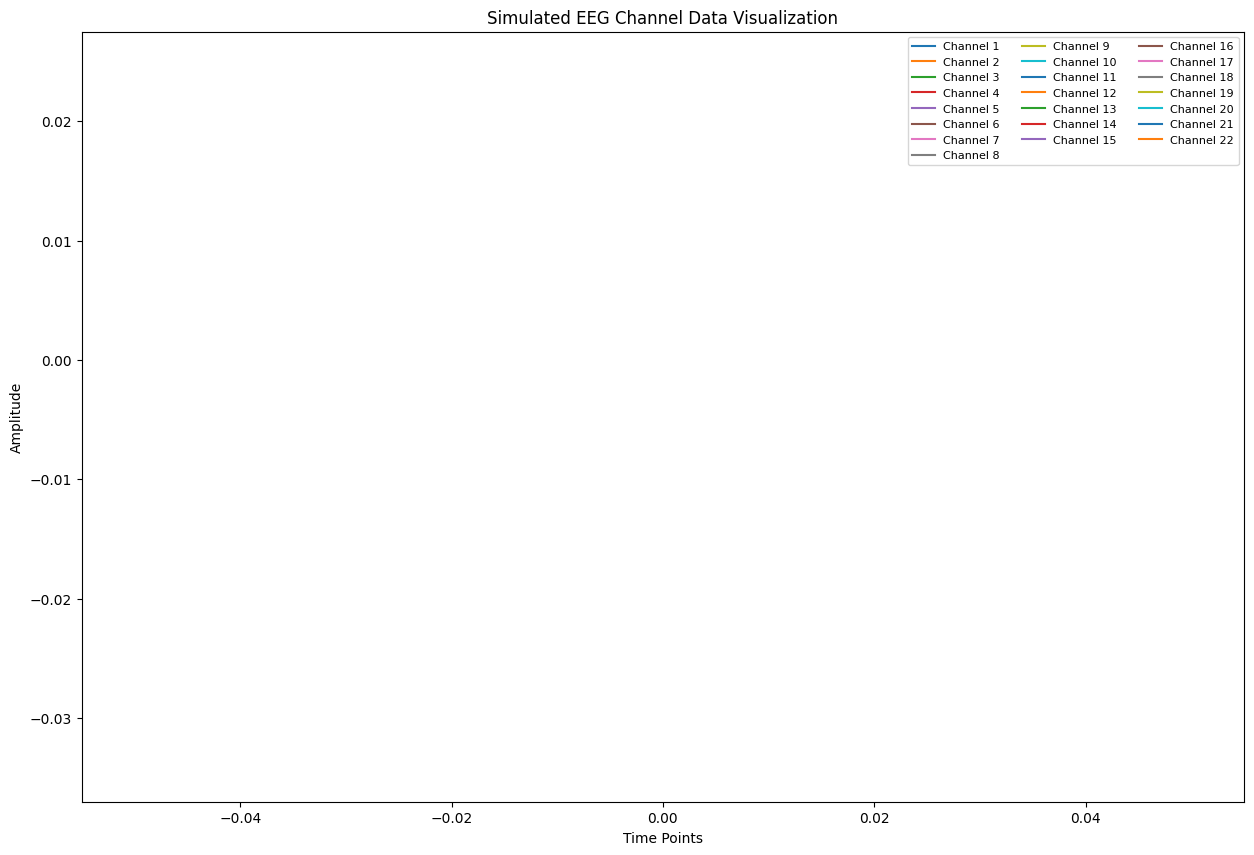

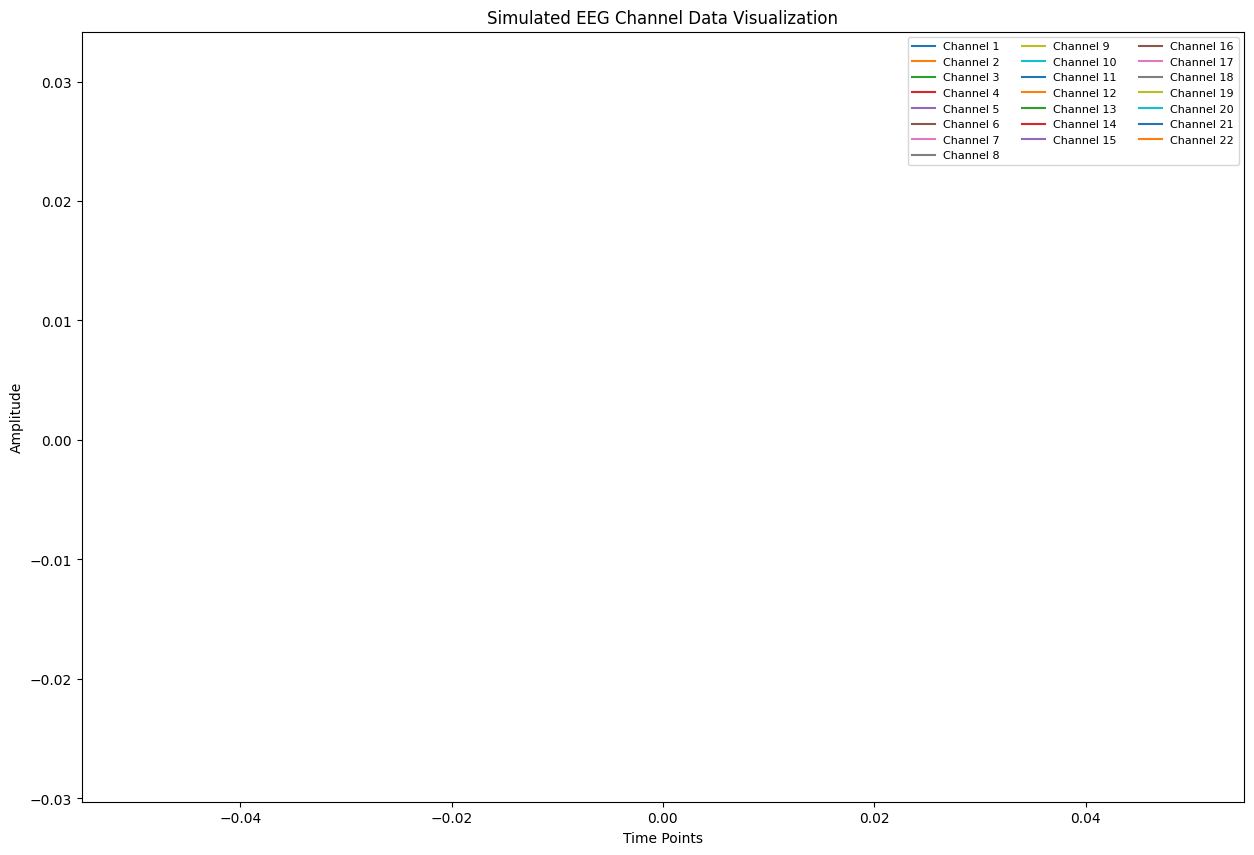

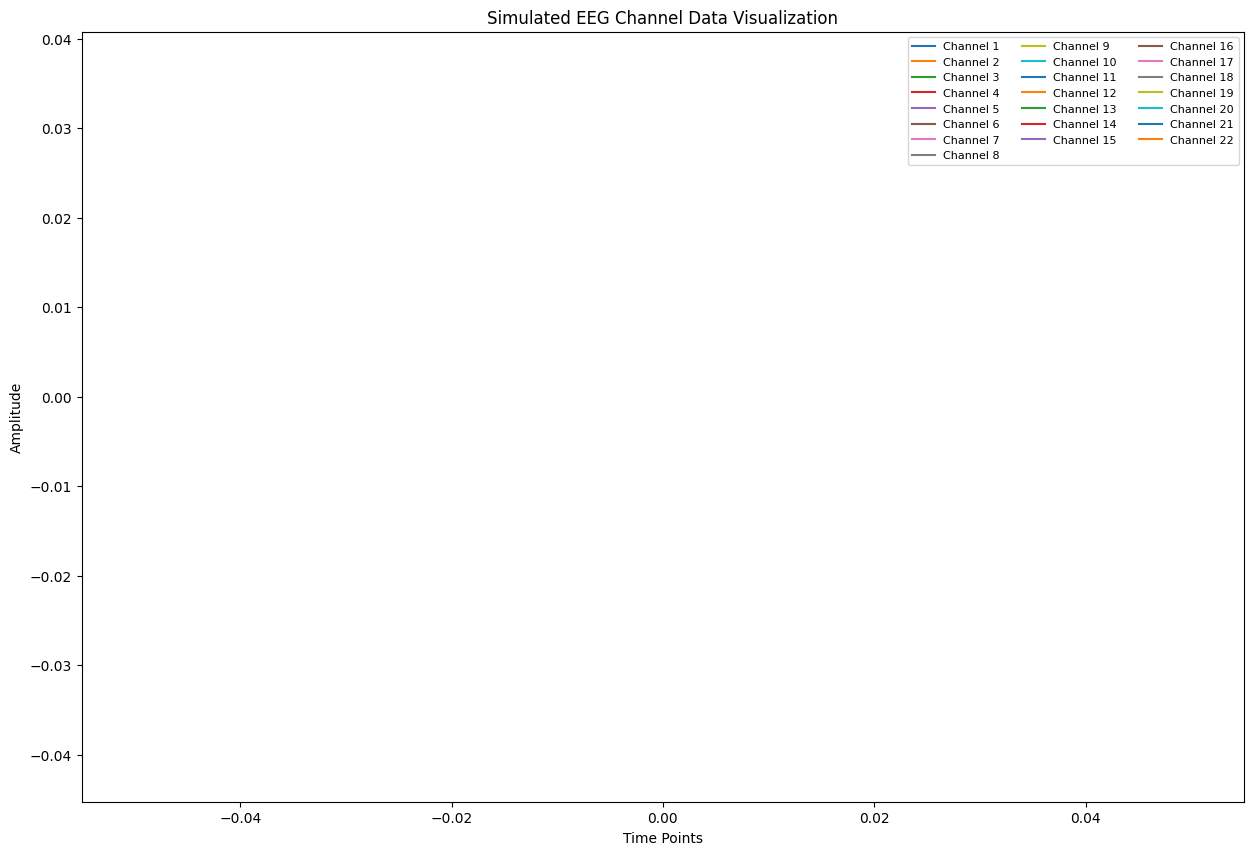

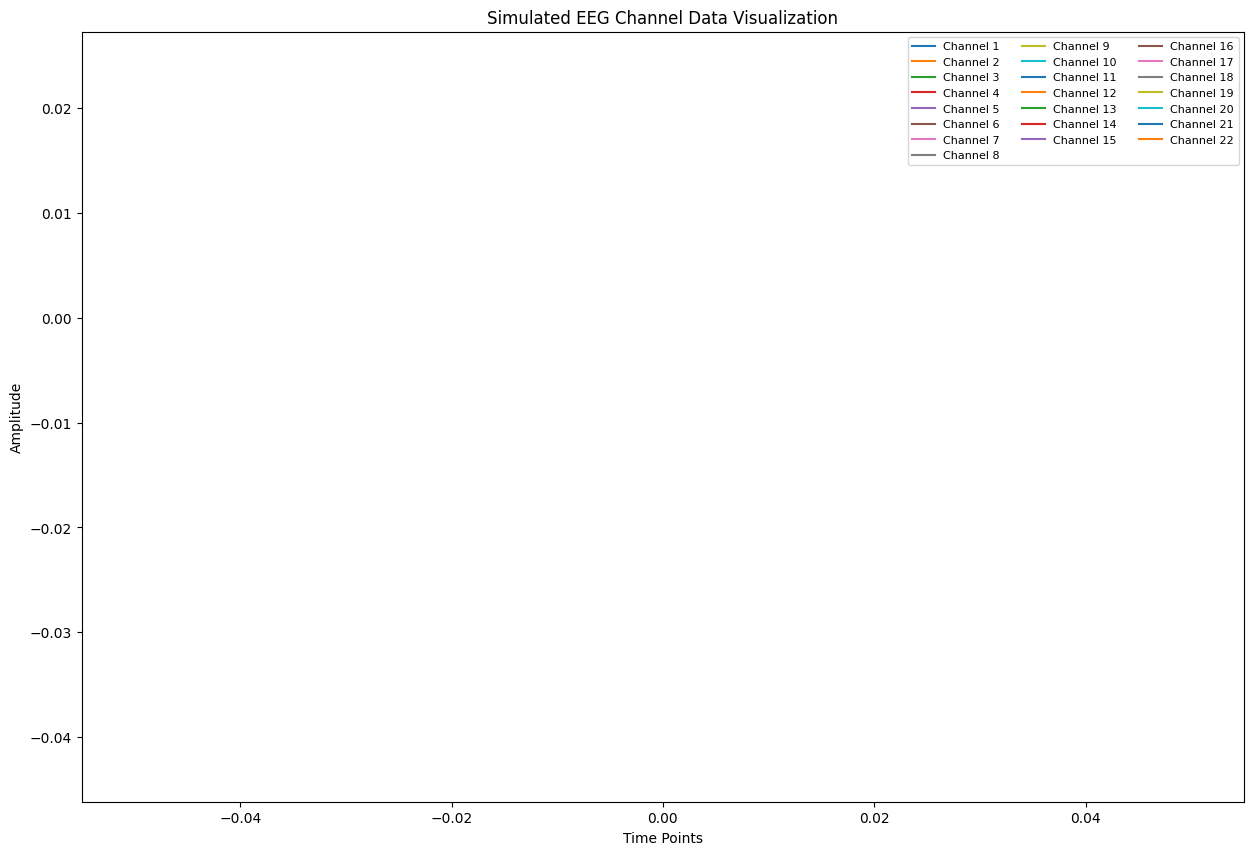

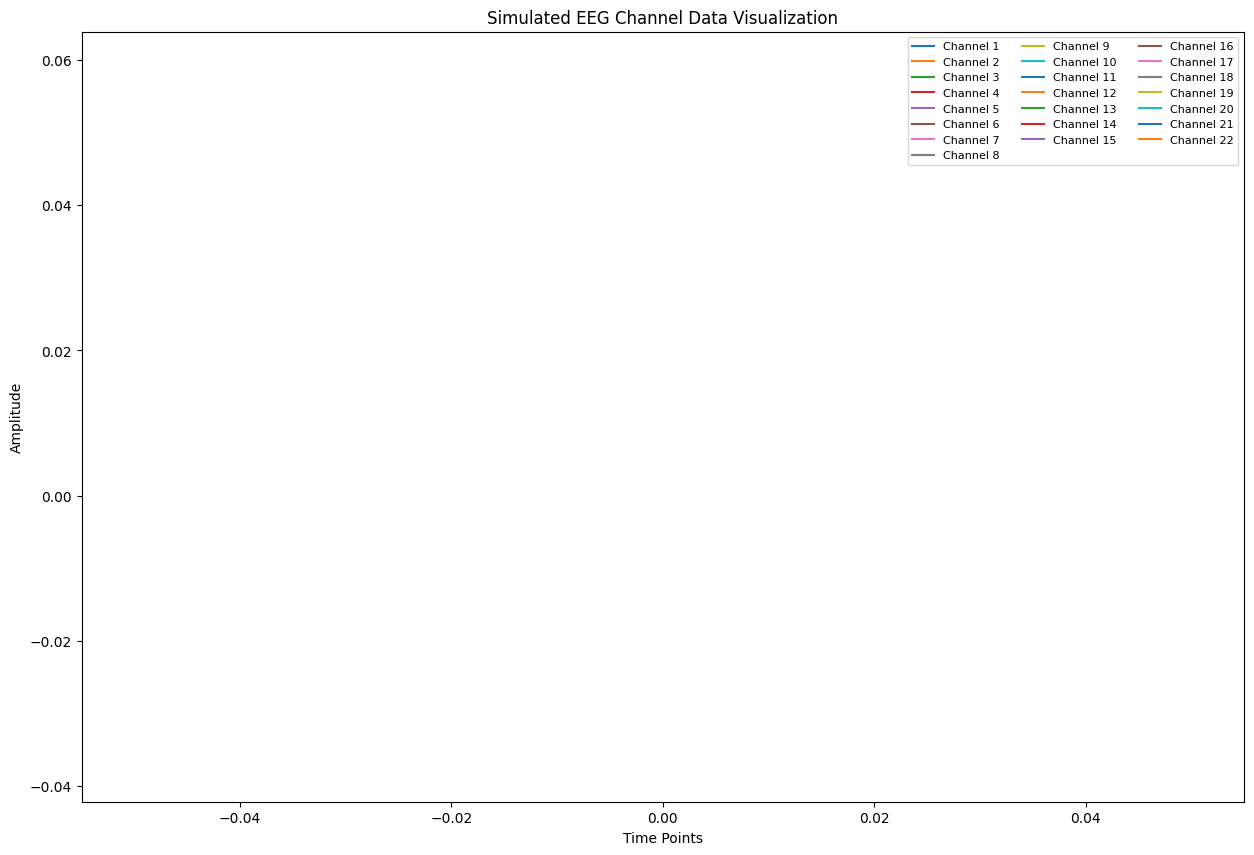

In [ ]:
for kernel in range(40):
    visualize_eeg_weights(convDictionaryModel.spatial_layers['subject_1'].weight.data[kernel], isSqueezed=False, kernel_number=0)

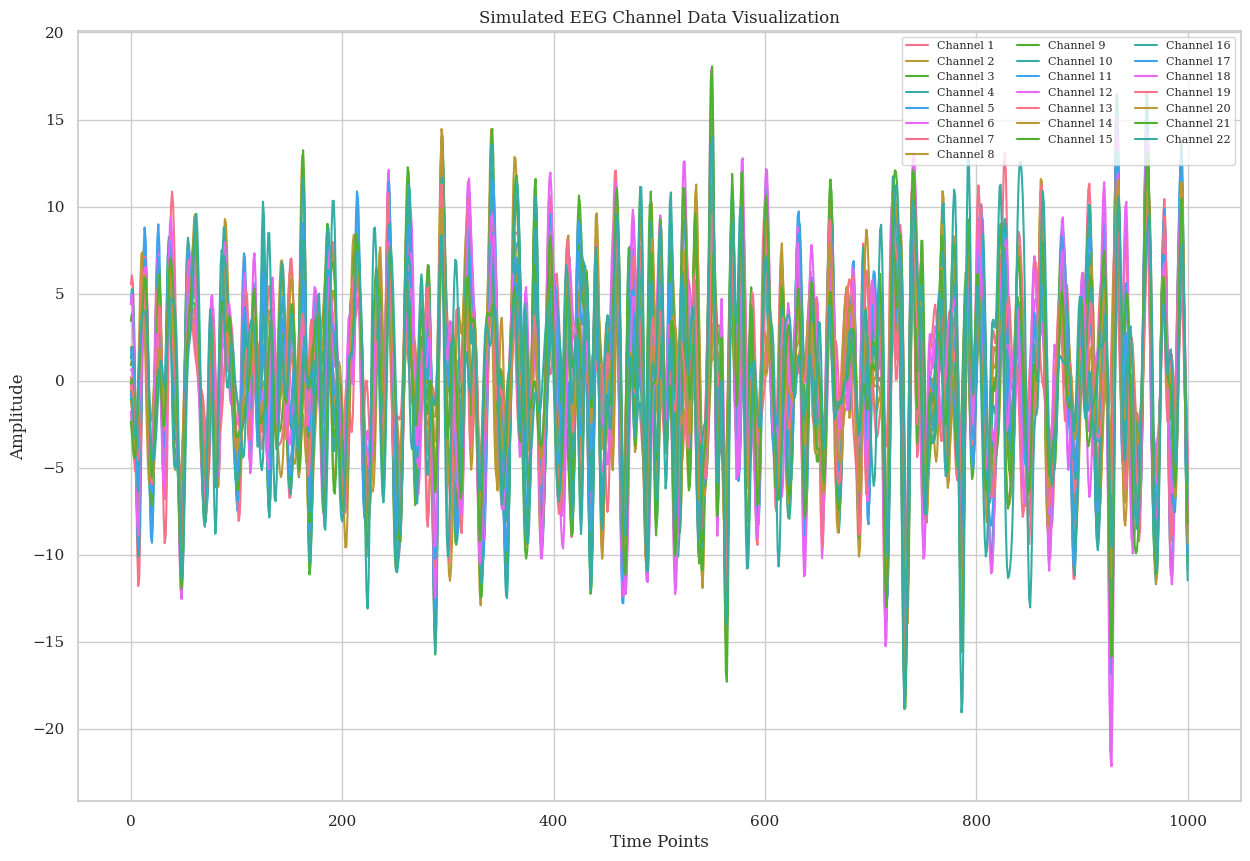

In [ ]:

visualize_eeg_weights(X, isSqueezed=False)